# Proyek Analisis Data: E-Commerce Public Dataset (Brazilian E-Commerce Public Dataset by Olist)

- **Nama:** Muhammad Ikhlas Naufalsyah Ranau
- **Email:** naufalsyah.ranau@gmail.com
- **ID Dicoding:** mikhlasnr


## 🎯 Menentukan Pertanyaan Bisnis

Sebelum memulai analisis, kita perlu menentukan pertanyaan bisnis yang akan dijawab. Ini membantu fokus analisis dan memastikan hasil yang actionable.

### Pertanyaan Bisnis yang Akan Dijawab:

**1) Pertumbuhan & Pendapatan**
- Bagaimana tren jumlah pesanan, GMV (price + freight), dan AOV per bulan selama 2016–2018?
- Bulan/musim apa dengan performa tertinggi dan terendah?

**2) Kategori Produk**
- Kategori produk mana yang menyumbang GMV dan volume terbesar?
- Kategori mana yang memiliki rasio ongkir (freight/GMV) relatif tinggi?

**3) Pelanggan & Retensi (RFM Analysis)**
- Siapa pelanggan bernilai tinggi (Top/High Value) berdasarkan RFM?
- Bagaimana distribusi segmentasi pelanggan berdasarkan RFM score?

**4) Geospatial Analysis**
- Di wilayah mana konsentrasi pelanggan dan penjual tertinggi?
- Bagaimana peta kepadatan (heatmap) transaksi berdasarkan lokasi?
- Di kota mana terdapat kesenjangan supply-demand (gap) tertinggi?
- Kota mana yang memiliki permintaan tinggi namun penjual terbatas (peluang ekspansi)?

---

**Keterangan Metrik:**
- **GMV (Gross Merchandise Value)**: Total nilai transaksi (harga produk + ongkir)
- **AOV (Average Order Value)**: Nilai rata-rata per transaksi = GMV / Jumlah Order
- **RFM**: Recency (kapan terakhir beli), Frequency (seberapa sering), Monetary (berapa banyak uang yang dikeluarkan)


## 📚 Menyiapkan Library yang Dibutuhkan

**Tujuan:** Mengimpor semua library Python yang diperlukan untuk analisis data, visualisasi, dan analisis geospatial.

**Library yang digunakan:**
- `numpy` & `pandas`: Manipulasi dan analisis data
- `matplotlib` & `seaborn`: Visualisasi data
- `folium`: Membuat peta interaktif untuk analisis geospatial
- `IPython.display`: Menampilkan output yang diformat dengan baik


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MonthLocator
import seaborn as sns
import folium
from folium.plugins import HeatMap
from IPython.display import display
import os

# Konfigurasi style untuk visualisasi
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Library berhasil diimport!")


✅ Library berhasil diimport!


## 🔄 Data Wrangling

Data Wrangling adalah proses persiapan data sebelum analisis. Tahapan ini terdiri dari:
1. **Gathering Data**: Mengumpulkan/memuat data dari berbagai sumber
2. **Assessing Data**: Mengevaluasi kualitas data (missing values, duplikasi, tipe data)
3. **Cleaning Data**: Membersihkan data (menangani missing values, duplikasi, normalisasi)


### 📥 Gathering Data

**Tujuan:** Memuat semua dataset CSV dari folder `data/` ke dalam DataFrame pandas.

**Dataset yang akan dimuat:**
- `customers_dataset.csv`: Data pelanggan (ID, lokasi)
- `sellers_dataset.csv`: Data penjual (ID, lokasi)
- `geolocation_dataset.csv`: Data koordinat geografis (lat/lng per zip code)
- `product_category_name_translation.csv`: Mapping kategori produk (Portugis → Inggris)
- `products_dataset.csv`: Data produk (ID, kategori, dimensi, berat)
- `orders_dataset.csv`: Data pesanan (ID, tanggal, status)
- `order_items_dataset.csv`: Item dalam setiap pesanan (produk, harga, ongkir)
- `order_payments_dataset.csv`: Data pembayaran per pesanan

**Output yang diharapkan:** Informasi jumlah baris untuk setiap dataset


In [2]:
# Path data
base_path = 'data'

# Load dataset utama
customers_df = pd.read_csv(base_path + '/customers_dataset.csv')
sellers_df = pd.read_csv(base_path + '/sellers_dataset.csv')
geolocation_df = pd.read_csv(base_path + '/geolocation_dataset.csv')
product_category_df = pd.read_csv(base_path + '/product_category_name_translation.csv')
products_df = pd.read_csv(base_path + '/products_dataset.csv')
orders_df = pd.read_csv(base_path + '/orders_dataset.csv')
order_items_df = pd.read_csv(base_path + '/order_items_dataset.csv')
order_payments_df = pd.read_csv(base_path + '/order_payments_dataset.csv')

print('📊 Dataset loaded:')
for name, df in [
    ('customers', customers_df),
    ('sellers', sellers_df),
    ('geolocation', geolocation_df),
    ('product_category', product_category_df),
    ('products', products_df),
    ('orders', orders_df),
    ('order_items', order_items_df),
    ('order_payments', order_payments_df),
]:
    print(f"  ✓ {name}: {len(df):,} rows")


📊 Dataset loaded:
  ✓ customers: 99,441 rows
  ✓ sellers: 3,095 rows
  ✓ geolocation: 1,000,163 rows
  ✓ product_category: 71 rows
  ✓ products: 32,951 rows
  ✓ orders: 99,441 rows
  ✓ order_items: 112,650 rows
  ✓ order_payments: 103,886 rows


**📝 Insight Gathering Data:**
- Semua dataset berhasil dimuat dengan total 9 file CSV
- Dataset terbesar adalah `geolocation` dengan >1 juta baris (data koordinat per zip code)
- Dataset utama untuk analisis: `orders`, `order_items`, `customers`, `products`
- Relasi antar tabel: `order_id` menghubungkan orders dengan order_items, `customer_id` menghubungkan orders dengan customers, `product_id` menghubungkan order_items dengan products


### 🔍 Assessing Data

**Tujuan:** Mengevaluasi kualitas data untuk mengidentifikasi masalah yang perlu ditangani pada tahap cleaning.

**Aspek yang dinilai:**
- Struktur data (kolom, tipe data, jumlah baris)
- Missing values (nilai yang kosong)
- Duplikasi data
- Konsistensi data (nilai yang tidak masuk akal)

**Tabel yang akan dinilai:**
1. `customers_df` - Data pelanggan
2. `sellers_df` - Data penjual
3. `geolocation_df` - Data geografis
4. `product_category_df` - Mapping kategori produk (Portugis → Inggris)
5. `products_df` - Data produk
6. `orders_df` - Data pesanan
7. `order_items_df` - Item dalam pesanan
8. `order_payments_df` - Data pembayaran per pesanan


#### Menilai tabel `customers_df`

**Tujuan:** Memahami struktur dan kualitas data pelanggan.

**Yang akan dicek:**
- Kolom apa saja yang ada
- Tipe data setiap kolom
- Apakah ada missing values
- Apakah ada duplikasi data


#### Menilai tabel `sellers_df`

**Tujuan:** Memahami struktur dan kualitas data penjual yang penting untuk analisis geospatial.

**Yang akan dicek:**
- Kolom apa saja yang ada
- Tipe data setiap kolom
- Apakah ada missing values
- Apakah ada duplikasi data
- Konsistensi data lokasi penjual


#### Menilai tabel `geolocation_df`

**Tujuan:** Memahami data geografis yang digunakan untuk analisis geospatial dan visualisasi peta.

**Yang akan dicek:**
- Struktur data geolocation (zip code, koordinat)
- Missing values pada koordinat geografis
- Konsistensi data lokasi


#### Menilai tabel `product_category_df`

**Tujuan:** Memahami data mapping kategori produk dari bahasa Portugis ke bahasa Inggris yang digunakan untuk analisis kategori.

**Yang akan dicek:**
- Struktur data mapping kategori
- Kelengkapan mapping (apakah semua kategori ter-mapping)
- Missing values pada kolom penting


In [3]:
# Menampilkan informasi struktur tabel product_category
product_category_df.info()
print("\n" + "="*60)
print("Sample data product_category:")
product_category_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB

Sample data product_category:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [4]:
# Mengecek missing values dan duplikasi
print("Missing values per kolom:")
print(product_category_df.isna().sum())
print(f"\nJumlah duplikasi: {product_category_df.duplicated().sum()}")
print(f"\nJumlah kategori unik:")
if 'product_category_name' in product_category_df.columns:
    print(f"  - Kategori Portugis: {product_category_df['product_category_name'].nunique()}")
if 'product_category_name_english' in product_category_df.columns:
    print(f"  - Kategori Inggris: {product_category_df['product_category_name_english'].nunique()}")
print(f"\nTotal baris: {len(product_category_df):,}")
print(f"\nSample mapping:")
if 'product_category_name' in product_category_df.columns and 'product_category_name_english' in product_category_df.columns:
    display(product_category_df.head(10))


Missing values per kolom:
product_category_name            0
product_category_name_english    0
dtype: int64

Jumlah duplikasi: 0

Jumlah kategori unik:
  - Kategori Portugis: 71
  - Kategori Inggris: 71

Total baris: 71

Sample mapping:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


**📝 Insight Assessing `product_category_df`:**
- Tabel product_category berisi mapping kategori produk dari bahasa Portugis ke bahasa Inggris
- Data ini digunakan untuk mentranslasikan nama kategori produk agar lebih mudah dianalisis
- Mapping ini penting untuk analisis kategori produk karena memungkinkan analisis menggunakan bahasa Inggris
- Data siap digunakan untuk mapping kategori produk pada tahap cleaning


In [5]:
# Menampilkan informasi struktur tabel geolocation
geolocation_df.info()
print("\n" + "="*60)
print("Sample data geolocation:")
geolocation_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB

Sample data geolocation:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
# Mengecek missing values dan duplikasi
print("Missing values per kolom:")
print(geolocation_df.isna().sum())
print(f"\nJumlah duplikasi: {geolocation_df.duplicated().sum()}")
print(f"\nStatistik koordinat geografis:")
if 'geolocation_lat' in geolocation_df.columns and 'geolocation_lng' in geolocation_df.columns:
    print(geolocation_df[['geolocation_lat', 'geolocation_lng']].describe())
print(f"\nJumlah zip code prefix unik: {geolocation_df['geolocation_zip_code_prefix'].nunique() if 'geolocation_zip_code_prefix' in geolocation_df.columns else 'N/A'}")

# Deteksi outlier pada koordinat geografis
print("\n" + "="*60)
print("🔍 Deteksi Outlier pada Koordinat Geografis:")
print("="*60)

if 'geolocation_lat' in geolocation_df.columns and 'geolocation_lng' in geolocation_df.columns:
    # Range valid untuk Brasil: lat -33.7 hingga 5.2, lng -73.9 hingga -34.7
    # Deteksi outlier menggunakan IQR method
    Q1_lat = geolocation_df['geolocation_lat'].quantile(0.25)
    Q3_lat = geolocation_df['geolocation_lat'].quantile(0.75)
    IQR_lat = Q3_lat - Q1_lat
    lower_bound_lat = Q1_lat - 1.5 * IQR_lat
    upper_bound_lat = Q3_lat + 1.5 * IQR_lat

    Q1_lng = geolocation_df['geolocation_lng'].quantile(0.25)
    Q3_lng = geolocation_df['geolocation_lng'].quantile(0.75)
    IQR_lng = Q3_lng - Q1_lng
    lower_bound_lng = Q1_lng - 1.5 * IQR_lng
    upper_bound_lng = Q3_lng + 1.5 * IQR_lng

    # Deteksi koordinat di luar range Brasil
    outliers_brasil_lat = geolocation_df[
        (geolocation_df['geolocation_lat'] < -33.7) |
        (geolocation_df['geolocation_lat'] > 5.2)
    ]
    outliers_brasil_lng = geolocation_df[
        (geolocation_df['geolocation_lng'] < -73.9) |
        (geolocation_df['geolocation_lng'] > -34.7)
    ]

    # Deteksi outlier menggunakan IQR
    outliers_iqr_lat = geolocation_df[
        (geolocation_df['geolocation_lat'] < lower_bound_lat) |
        (geolocation_df['geolocation_lat'] > upper_bound_lat)
    ]
    outliers_iqr_lng = geolocation_df[
        (geolocation_df['geolocation_lng'] < lower_bound_lng) |
        (geolocation_df['geolocation_lng'] > upper_bound_lng)
    ]

    print(f"\n📍 Outlier berdasarkan Range Brasil:")
    print(f"  - Latitude di luar range Brasil (-33.7 hingga 5.2): {len(outliers_brasil_lat):,} baris ({len(outliers_brasil_lat)/len(geolocation_df)*100:.2f}%)")
    print(f"  - Longitude di luar range Brasil (-73.9 hingga -34.7): {len(outliers_brasil_lng):,} baris ({len(outliers_brasil_lng)/len(geolocation_df)*100:.2f}%)")

    print(f"\n📊 Outlier berdasarkan IQR Method:")
    print(f"  - Latitude outlier (IQR): {len(outliers_iqr_lat):,} baris ({len(outliers_iqr_lat)/len(geolocation_df)*100:.2f}%)")
    print(f"  - Longitude outlier (IQR): {len(outliers_iqr_lng):,} baris ({len(outliers_iqr_lng)/len(geolocation_df)*100:.2f}%)")

    # Gabungan outlier (baik lat atau lng yang outlier)
    outliers_combined = geolocation_df[
        ((geolocation_df['geolocation_lat'] < lower_bound_lat) | (geolocation_df['geolocation_lat'] > upper_bound_lat)) |
        ((geolocation_df['geolocation_lng'] < lower_bound_lng) | (geolocation_df['geolocation_lng'] > upper_bound_lng))
    ]
    print(f"  - Total baris dengan outlier (lat atau lng): {len(outliers_combined):,} baris ({len(outliers_combined)/len(geolocation_df)*100:.2f}%)")

    if len(outliers_brasil_lat) > 0 or len(outliers_brasil_lng) > 0:
        print(f"\n⚠️  Ditemukan koordinat yang di luar range geografis Brasil!")
        print(f"   Contoh koordinat outlier:")
        if len(outliers_brasil_lat) > 0:
            print(f"   - Latitude ekstrem: min={geolocation_df['geolocation_lat'].min():.2f}, max={geolocation_df['geolocation_lat'].max():.2f}")
        if len(outliers_brasil_lng) > 0:
            print(f"   - Longitude ekstrem: min={geolocation_df['geolocation_lng'].min():.2f}, max={geolocation_df['geolocation_lng'].max():.2f}")


Missing values per kolom:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Jumlah duplikasi: 261831

Statistik koordinat geografis:
       geolocation_lat  geolocation_lng
count     1.000163e+06     1.000163e+06
mean     -2.117615e+01    -4.639054e+01
std       5.715866e+00     4.269748e+00
min      -3.660537e+01    -1.014668e+02
25%      -2.360355e+01    -4.857317e+01
50%      -2.291938e+01    -4.663788e+01
75%      -1.997962e+01    -4.376771e+01
max       4.506593e+01     1.211054e+02

Jumlah zip code prefix unik: 19015

🔍 Deteksi Outlier pada Koordinat Geografis:

📍 Outlier berdasarkan Range Brasil:
  - Latitude di luar range Brasil (-33.7 hingga 5.2): 31 baris (0.00%)
  - Longitude di luar range Brasil (-73.9 hingga -34.7): 37 baris (0.00%)

📊 Outlier berdasarkan IQR Method:
  - Latitude outlier (IQR): 168,240 baris (16.82%)
  - Longitude outlier (IQR): 

**📝 Insight Assessing `geolocation_df`:**
- Tabel geolocation berisi data koordinat geografis (latitude, longitude) untuk setiap zip code prefix
- Data ini digunakan untuk analisis geospatial dan visualisasi peta heatmap
- Koordinat geografis penting untuk memahami distribusi geografis pelanggan dan penjual
- **⚠️ Ditemukan outlier pada koordinat geografis:**
  - Terdapat koordinat yang di luar range geografis Brasil (latitude valid: -33.7 hingga 5.2, longitude valid: -73.9 hingga -34.7)
  - Outlier ini kemungkinan disebabkan oleh kesalahan input data atau koordinat yang tidak valid
  - Perlu dilakukan filtering atau cleaning pada koordinat outlier sebelum digunakan untuk analisis geospatial
  - Outlier dapat mempengaruhi akurasi visualisasi peta dan analisis distribusi geografis
- Data perlu dibersihkan dari outlier sebelum digunakan untuk analisis geospatial dan visualisasi peta


In [7]:
# Menampilkan informasi struktur tabel sellers
sellers_df.info()
print("\n" + "="*60)
print("Sample data sellers:")
sellers_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB

Sample data sellers:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [8]:
# Mengecek missing values dan duplikasi
print("Missing values per kolom:")
print(sellers_df.isna().sum())
print(f"\nJumlah duplikasi: {sellers_df.duplicated().sum()}")
print(f"Jumlah seller unik: {sellers_df['seller_id'].nunique():,}")
print(f"Jumlah seller zip code prefix unik: {sellers_df['seller_zip_code_prefix'].nunique():,}")
print(f"\nTop 10 kota dengan seller terbanyak:")
if 'seller_city' in sellers_df.columns:
    print(sellers_df['seller_city'].value_counts().head(10))


Missing values per kolom:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Jumlah duplikasi: 0
Jumlah seller unik: 3,095
Jumlah seller zip code prefix unik: 2,246

Top 10 kota dengan seller terbanyak:
seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
guarulhos          50
ibitinga           49
santo andre        45
campinas           41
maringa            40
Name: count, dtype: int64


**📝 Insight Assessing `sellers_df`:**
- Tabel sellers memiliki kolom: seller_id, seller_zip_code_prefix, seller_city, seller_state
- Data sellers penting untuk analisis geospatial dan gap supply-demand
- Tidak ada missing values pada tabel sellers
- Data siap digunakan untuk analisis geospatial tanpa perlu cleaning khusus


In [9]:
# Menampilkan informasi struktur tabel customers
customers_df.info()
print("\n" + "="*60)
print("Sample data customers:")
customers_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Sample data customers:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [10]:
# Mengecek missing values dan duplikasi
print("Missing values per kolom:")
print(customers_df.isna().sum())
print(f"\nJumlah duplikasi: {customers_df.duplicated().sum()}")
print(f"Jumlah customer unique: {customers_df['customer_unique_id'].nunique():,}")
print(f"Jumlah customer_id: {customers_df['customer_id'].nunique():,}")


Missing values per kolom:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Jumlah duplikasi: 0
Jumlah customer unique: 96,096
Jumlah customer_id: 99,441


**📝 Insight Assessing `customers_df`:**
- Tabel customers memiliki 5 kolom: customer_id, customer_unique_id, zip_code_prefix, city, state
- Tidak ada missing values pada tabel customers
- `customer_unique_id` digunakan untuk identifikasi unik pelanggan (satu pelanggan bisa punya multiple customer_id jika membuat akun baru)
- Data siap digunakan tanpa perlu cleaning khusus


#### Menilai tabel `products_df`

**Tujuan:** Memahami data produk, terutama kategori produk yang penting untuk analisis kategori.

**Yang akan dicek:**
- Missing values pada kategori produk
- Konsistensi data produk


#### Menilai tabel `orders_df`

**Tujuan:** Memahami struktur data pesanan, terutama kolom tanggal yang penting untuk analisis tren.

**Yang akan dicek:**
- Kolom tanggal (order_purchase_timestamp, dll)
- Status pesanan
- Missing values pada kolom penting


In [11]:
# Menampilkan informasi struktur tabel orders
orders_df.info()
print("\n" + "="*60)
print("Sample data orders:")
orders_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

Sample data orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
# Mengecek missing values dan statistik dasar
print("Missing values per kolom:")
print(orders_df.isna().sum())
print(f"\nJumlah duplikasi: {orders_df.duplicated().sum()}")
print(f"Jumlah order unik: {orders_df['order_id'].nunique():,}")
print(f"\nStatus pesanan:")
print(orders_df['order_status'].value_counts() if 'order_status' in orders_df.columns else "Kolom order_status tidak ditemukan")


Missing values per kolom:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Jumlah duplikasi: 0
Jumlah order unik: 99,441

Status pesanan:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


**📝 Insight Assessing `orders_df`:**
- Tabel orders berisi informasi pesanan dengan kolom tanggal penting untuk analisis tren
- Kolom tanggal masih dalam format string, perlu dikonversi ke datetime
- Beberapa kolom tanggal mungkin memiliki missing values (pesanan yang belum selesai)
- Kolom `order_purchase_timestamp` akan digunakan sebagai acuan waktu untuk analisis tren bulanan


In [13]:
# Menampilkan informasi struktur tabel products
products_df.info()
print("\n" + "="*60)
print("Missing values per kolom (diurutkan dari terbesar):")
print(products_df.isna().sum().sort_values(ascending=False))
print(f"\nJumlah duplikasi: {products_df.duplicated().sum()}")
print(f"\nSample data products:")
products_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB

Missing values per kolom (diurutkan dari terbesar):
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g        

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**📝 Insight Assessing `products_df`:**
- Tabel products memiliki missing values pada kolom `product_category_name` (sekitar 610 produk tanpa kategori)
- Missing values perlu diisi dengan nilai default seperti "uncategorized" agar tidak mengganggu analisis
- Kolom dimensi dan berat produk mungkin memiliki missing values yang perlu ditangani
- Perlu mapping kategori dari bahasa Portugis ke Inggris menggunakan `product_category_name_translation.csv`


#### Menilai tabel `order_items_df`

**Tujuan:** Memahami data item dalam pesanan, termasuk harga dan ongkir yang penting untuk menghitung GMV.

**Yang akan dicek:**
- Struktur data order items
- Konsistensi harga dan ongkir


In [14]:
# Menampilkan informasi struktur tabel order_items
order_items_df.info()
print("\n" + "="*60)
print("Missing values per kolom:")
print(order_items_df.isna().sum())
print(f"\nJumlah duplikasi: {order_items_df.duplicated().sum()}")
print(f"\nStatistik harga dan ongkir:")
print(order_items_df[['price', 'freight_value']].describe())
print(f"\nSample data order_items:")
order_items_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB

Missing values per kolom:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Jumlah duplikasi: 0

Statistik harga dan ongkir:
               price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**📝 Insight Assessing `order_items_df`:**
- Tabel order_items berisi detail setiap item dalam pesanan
- Kolom penting: `price` (harga produk) dan `freight_value` (ongkir)
- GMV = price + freight_value
- Tidak ada missing values pada kolom penting (price, freight_value)
- Data siap untuk perhitungan GMV dan analisis kategori produk
- Nilai 0 pada `freight_value` adalah **valid** dan merupakan bagian dari model bisnis e-commerce, hal tersebut disebabkan oleh Free Shipping / Gratis Ongkir, Seller Menanggung Ongkir (Seller Pays Shipping), Produk Digital atau Virtual, Order Pickup. sehingga tidak perlu dihapus atau diubah karena ini mencerminkan kondisi real di marketplace


#### Menilai tabel `order_payments_df`

**Tujuan:** Memahami data pembayaran per pesanan yang digunakan untuk analisis metode pembayaran dan nilai transaksi.

**Yang akan dicek:**
- Struktur data pembayaran
- Metode pembayaran yang digunakan
- Missing values pada kolom penting
- 


In [15]:
# Menampilkan informasi struktur tabel order_payments
order_payments_df.info()
print("\n" + "="*60)
print("Sample data order_payments:")
order_payments_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB

Sample data order_payments:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
# Mengecek missing values dan duplikasi
print("Missing values per kolom:")
print(order_payments_df.isna().sum())
print(f"\nJumlah duplikasi: {order_payments_df.duplicated().sum()}")
print(f"\nMetode pembayaran:")
if 'payment_type' in order_payments_df.columns:
    print(order_payments_df['payment_type'].value_counts())
print(f"\nStatistik nilai pembayaran:")
if 'payment_value' in order_payments_df.columns:
    print(order_payments_df[['payment_value']].describe())
order_unique_count = order_payments_df['order_id'].nunique() if 'order_id' in order_payments_df.columns else 'N/A'
print(f"\nJumlah order unik: {order_unique_count:,}" if isinstance(order_unique_count, int) else f"\nJumlah order unik: {order_unique_count}")

# Deteksi outlier pada payment_value
print("\n🔍 Deteksi Outlier pada Payment Value:")

if 'payment_value' in order_payments_df.columns:
    # Deteksi nilai 0 atau negatif
    zero_or_negative = order_payments_df[order_payments_df['payment_value'] <= 0]

    if len(zero_or_negative) > 0:

        print(f"\n⚠️  Ditemukan payment dengan nilai 0 atau negatif!")
        print(f"  - Jumlah payment dengan nilai <= 0: {len(zero_or_negative):,} baris ({len(zero_or_negative)/len(order_payments_df)*100:.2f}%)")
        print(f"   Ini mungkin kesalahan data atau refund yang perlu ditangani khusus")


Missing values per kolom:
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Jumlah duplikasi: 0

Metode pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

Statistik nilai pembayaran:
       payment_value
count  103886.000000
mean      154.100380
std       217.494064
min         0.000000
25%        56.790000
50%       100.000000
75%       171.837500
max     13664.080000

Jumlah order unik: 99,440

🔍 Deteksi Outlier pada Payment Value:

⚠️  Ditemukan payment dengan nilai 0 atau negatif!
  - Jumlah payment dengan nilai <= 0: 9 baris (0.01%)
   Ini mungkin kesalahan data atau refund yang perlu ditangani khusus


**📝 Insight Assessing `order_payments_df`:**
- Tabel order_payments berisi informasi pembayaran untuk setiap pesanan
- Kolom penting: `payment_type` (metode pembayaran) dan `payment_value` (nilai pembayaran)
- Satu order bisa memiliki multiple payment (installment/pembayaran cicilan)
- Data ini digunakan untuk agregasi nilai pembayaran per order dan analisis metode pembayaran
- **⚠️ Ditemukan outlier pada payment_value:**
  - Terdapat payment dengan nilai 0 yang mungkin merupakan refund atau kesalahan input
  - Perlu dilakukan analisis lebih lanjut untuk menentukan apakah outlier perlu dihapus atau ditangani khusus
  - Untuk analisis AOV (Average Order Value), outlier dapat diabaikan atau di-handle dengan menggunakan median sebagai alternatif
- Data perlu ditinjau ulang untuk outlier sebelum digunakan untuk analisis pembayaran dan perhitungan total nilai transaksi

### 🧹 Cleaning Data

**Tujuan:** Membersihkan dan mempersiapkan data untuk analisis dengan menangani masalah yang ditemukan pada tahap assessing.

**Langkah-langkah cleaning:**
1. Membershikan table orders_df: Konversi kolom tanggal ke format datetime
2. Membersihkan products_df: Mengisi missing values pada kategori produk dan Mapping kategori produk ke bahasa Inggris
3. Membersihkan order_items_df: Menghitung GMV per item 
4. Agregasi pembayaran per order
5. Menggabungkan semua data untuk analisis


#### Membersihkan tabel `orders_df`

**Tujuan:** Mengkonversi kolom tanggal dari string ke datetime agar dapat digunakan untuk analisis tren waktu.

**Kolom tanggal yang akan dikonversi:**
- `order_purchase_timestamp`: Tanggal pembelian (digunakan untuk analisis tren)
- `order_approved_at`: Tanggal persetujuan
- `order_delivered_carrier_date`: Tanggal dikirim ke kurir
- `order_delivered_customer_date`: Tanggal diterima pelanggan
- `order_estimated_delivery_date`: Estimasi tanggal pengiriman


In [17]:
# Konversi kolom tanggal ke datetime
datetime_columns = ['order_purchase_timestamp', 'order_approved_at',
                    'order_delivered_carrier_date', 'order_delivered_customer_date',
                    'order_estimated_delivery_date']

for column in datetime_columns:
    if column in orders_df.columns:
        orders_df[column] = pd.to_datetime(orders_df[column], errors='coerce')

print(f"\Setelah konversi:")
orders_df.info()


\Setelah konversi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**📝 Insight Cleaning `orders_df`:**
- Semua kolom tanggal berhasil dikonversi ke format datetime
- Kolom dengan `errors='coerce'` akan mengubah nilai yang tidak valid menjadi NaT (Not a Time)
- `order_purchase_timestamp` sekarang siap digunakan untuk analisis tren bulanan
- Missing values pada kolom tanggal adalah normal (pesanan yang belum selesai prosesnya)


#### Membersihkan tabel `products_df`

**Tujuan:** 
- Mengisi missing values pada kategori produk
- Membuat kolom kategori dalam bahasa Inggris untuk kemudahan analisis

**Langkah:**
1. Isi missing `product_category_name` dengan "uncategorized"
2. Mapping kategori Portugis ke Inggris menggunakan `product_category_name_translation.csv`
3. Buat kolom `product_category_en` untuk analisis


In [18]:
# Isi missing kategori produk
if 'product_category_name' in products_df.columns:
    products_df['product_category_name'] = products_df['product_category_name'].fillna('uncategorized')
    print(f"✅ Missing values pada product_category_name telah diisi")

# Mapping kategori ke English
if {'product_category_name','product_category_name_english'}.issubset(set(product_category_df.columns)):
    category_map = dict(zip(product_category_df['product_category_name'],
                           product_category_df['product_category_name_english']))
    products_df['product_category_en'] = products_df['product_category_name'].map(category_map)
    products_df['product_category_en'] = products_df['product_category_en'].fillna(products_df['product_category_name'])
    print(f"✅ Mapping kategori ke bahasa Inggris selesai")
else:
    products_df['product_category_en'] = products_df.get('product_category_name', 'uncategorized')

print(f"\nMissing values setelah cleaning: {products_df['product_category_en'].isna().sum()}")
print(f"Jumlah kategori unik: {products_df['product_category_en'].nunique()}")


✅ Missing values pada product_category_name telah diisi
✅ Mapping kategori ke bahasa Inggris selesai

Missing values setelah cleaning: 0
Jumlah kategori unik: 74


**📝 Insight Cleaning `products_df`:**
- Semua produk sekarang memiliki kategori (baik dalam bahasa Portugis maupun Inggris)
- Kolom `product_category_en` memudahkan analisis karena menggunakan bahasa Inggris
- Produk tanpa kategori diisi dengan "uncategorized" agar tidak hilang dari analisis
- Data siap untuk analisis kategori produk


#### Membersihkan tabel `order_items_df`

**Tujuan:** Menghitung GMV (Gross Merchandise Value) per item untuk analisis pendapatan.

**GMV per item = price + freight_value**

Ini akan digunakan untuk:
- Menghitung total GMV per order
- Analisis kategori produk berdasarkan GMV
- Analisis tren pendapatan bulanan


In [19]:
# Hitung GMV per item (price + freight)
order_items_df['item_gmv'] = order_items_df['price'] + order_items_df['freight_value']

# Cek missing values
print("Missing values:")
print(order_items_df.isna().sum())
print(f"\nJumlah duplikasi: {order_items_df.duplicated().sum()}")
print(f"\nStatistik GMV per item:")
print(order_items_df['item_gmv'].describe())
print(f"\n✅ GMV per item berhasil dihitung")


Missing values:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
item_gmv               0
dtype: int64

Jumlah duplikasi: 0

Statistik GMV per item:
count    112650.000000
mean        140.644059
std         190.724394
min           6.080000
25%          55.220000
50%          92.320000
75%         157.937500
max        6929.310000
Name: item_gmv, dtype: float64

✅ GMV per item berhasil dihitung


**📝 Insight Cleaning `order_items_df`:**
- GMV per item berhasil dihitung dengan menambahkan price dan freight_value
- Kolom `item_gmv` akan digunakan untuk agregasi GMV per order dan per kategori
- Tidak ada missing values pada kolom penting
- Data siap untuk analisis pendapatan dan kategori produk


#### Membersihkan dan agregasi `order_payments_df`

**Tujuan:** Mengagregasi pembayaran per order karena satu order bisa memiliki multiple metode pembayaran.

**Langkah:**
- Group by `order_id` dan sum `payment_value` untuk mendapatkan total pembayaran per order
- Ini penting untuk analisis AOV (Average Order Value)


In [20]:
# Agregasi pembayaran per order (satu order bisa punya multiple payment)
payments_agg_df = order_payments_df.groupby('order_id', as_index=False).agg({
    'payment_value': 'sum',
    'payment_installments': 'max' if 'payment_installments' in order_payments_df.columns else 'size'
})

print(f"✅ Total orders dengan payment: {len(payments_agg_df):,}")
print(f"Sample data payments agregasi:")
payments_agg_df.head()


✅ Total orders dengan payment: 99,440
Sample data payments agregasi:


,order_id,payment_value,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,2
1,00018f77f2f0320c557190d7a144bdd3,259.83,3
2,000229ec398224ef6ca0657da4fc703e,216.87,5
3,00024acbcdf0a6daa1e931b038114c75,25.78,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,3


**📝 Insight Cleaning `order_payments_df`:**
- Pembayaran berhasil diagregasi per order
- Setiap order sekarang memiliki total `payment_value` yang dapat digunakan untuk analisis
- Data siap untuk digabungkan dengan tabel orders untuk analisis lengkap


#### Menggabungkan semua data untuk analisis

**Tujuan:** Membuat dataset terintegrasi yang menggabungkan informasi dari semua tabel untuk analisis yang lebih komprehensif.

**Langkah penggabungan:**
1. Gabungkan `order_items` dengan `products` (untuk mendapatkan kategori produk)
2. Agregasi per order (hitung total GMV, items per order)
3. Gabungkan dengan `orders` (untuk mendapatkan tanggal)
4. Gabungkan dengan `customers` (untuk mendapatkan lokasi pelanggan)
5. Gabungkan dengan `payments` (untuk mendapatkan nilai pembayaran)
6. Filter hanya order yang valid (punya tanggal purchase)
7. Buat kolom bulan untuk analisis tren

In [21]:
# 1. Gabungkan order_items dengan products (untuk kategori)
order_items_products = order_items_df.merge(
    products_df[['product_id', 'product_category_en']],
    on='product_id',
    how='left'
)

# Export order_items_products ke folder dashboard
dashboard_dir = 'dashboard'
os.makedirs(dashboard_dir, exist_ok=True)

output_path = os.path.join(dashboard_dir, 'order_items_products.csv')
order_items_products.to_csv(output_path, index=False)
print(f"✅ Data order_items_products berhasil diekspor ke: {output_path}")
print(f"📊 Total baris yang diekspor: {len(order_items_products):,}")

# 2. Agregasi per order
order_item_agg = order_items_products.groupby('order_id', as_index=False).agg({
    'order_item_id': 'count',
    'price': 'sum',
    'freight_value': 'sum',
    'item_gmv': 'sum'
}).rename(columns={'order_item_id': 'items_per_order', 'item_gmv': 'order_gmv'})

# 3. Gabungkan dengan orders (tanggal) dan customers (termasuk zip prefix)
orders_enriched = orders_df.merge(
    order_item_agg,
    on='order_id',
    how='left'
).merge(
    customers_df[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state', 'customer_zip_code_prefix']],
    on='customer_id',
    how='left'
).merge(
    payments_agg_df[['order_id', 'payment_value']],
    on='order_id',
    how='left'
)

# 4. Filter hanya order yang sudah delivered dan punya tanggal purchase
# Filter ini penting untuk memastikan kita hanya menganalisis transaksi yang benar-benar selesai
# Order dengan status 'canceled', 'unavailable', 'shipped' (belum delivered) tidak termasuk
orders_enriched = orders_enriched[
    (orders_enriched['order_status'] == 'delivered') &
    (orders_enriched['order_purchase_timestamp'].notna())
].copy()

print(f"📊 Total orders sebelum filter: {len(orders_df):,}")
print(f"📊 Total orders setelah filter delivered: {len(orders_enriched):,}")
print(f"📉 Orders yang dihapus: {len(orders_df) - len(orders_enriched):,} (non-delivered orders)")

# 5. Buat kolom bulan untuk analisis tren
orders_enriched['order_date'] = orders_enriched['order_purchase_timestamp'].dt.to_period('M').dt.to_timestamp()
print(f"Total orders setelah cleaning: {len(orders_enriched):,}")

print(orders_enriched.describe())


✅ Data order_items_products berhasil diekspor ke: dashboard/order_items_products.csv
📊 Total baris yang diekspor: 112,650
📊 Total orders sebelum filter: 99,441
📊 Total orders setelah filter delivered: 96,478
📉 Orders yang dihapus: 2,963 (non-delivered orders)
Total orders setelah cleaning: 96,478
            order_purchase_timestamp              order_approved_at  \
count                          96478                          96464   
mean   2018-01-01 23:29:31.939913984  2018-01-02 10:53:23.338012160   
min              2016-09-15 12:16:38            2016-09-15 12:16:38   
25%    2017-09-14 09:00:23.249999872            2017-09-14 14:48:54   
50%              2018-01-20 19:45:45            2018-01-22 13:50:04   
75%              2018-05-05 18:54:47  2018-05-06 10:57:24.750000128   
max              2018-08-29 15:00:37            2018-08-29 15:10:26   
std                              NaN                            NaN   

        order_delivered_carrier_date  order_delivered_customer

In [22]:
print(f"\nSample data (menampilkan beberapa baris pertama):")
display(orders_enriched.head(10))

# Export orders_enriched ke folder dashboard
dashboard_dir = 'dashboard'
os.makedirs(dashboard_dir, exist_ok=True)

output_path = os.path.join(dashboard_dir, 'orders_enriched.csv')
orders_enriched.to_csv(output_path, index=False)
print(f"\n✅ Data berhasil diekspor ke: {output_path}")
print(f"📊 Total baris yang diekspor: {len(orders_enriched):,}")


Sample data (menampilkan beberapa baris pertama):


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,items_per_order,price,freight_value,order_gmv,customer_unique_id,customer_city,customer_state,customer_zip_code_prefix,payment_value,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,29.99,8.72,38.71,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,3149,38.71,2017-10-01
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,118.70,22.76,141.46,af07308b275d755c9edb36a90c618231,barreiras,BA,47813,141.46,2018-07-01
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,159.90,19.22,179.12,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,75265,179.12,2018-08-01
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,45.00,27.20,72.20,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,59296,72.20,2017-11-01
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,19.90,8.72,28.62,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,9195,28.62,2018-02-01
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,1.0,147.90,27.36,175.26,80bb27c7c16e8f973207a5086ab329e2,congonhinhas,PR,86320,175.26,2017-07-01
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,1.0,59.99,15.17,75.16,932afa1e708222e5821dac9cd5db4cae,nilopolis,RJ,26525,75.16,2017-05-01
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06,1.0,19.90,16.05,35.95,39382392765b6dc74812866ee5ee92a7,faxinalzinho,RS,99655,35.95,2017-01-01
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,1.0,149.99,19.77,169.76,299905e3934e9e181bfb2e164dd4b4f8,sorocaba,SP,18075,169.76,2017-07-01
10,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,2.0,198.00,61.06,259.06,f2a85dec752b8517b5e58a06ff3cd937,rio de janeiro,RJ,20780,259.06,2017-05-01



✅ Data berhasil diekspor ke: dashboard/orders_enriched.csv
📊 Total baris yang diekspor: 96,478


**📝 Insight Penggabungan Data:**

**Filter yang Diterapkan:**
1. **Filter Order Status = 'delivered'**: Hanya order yang berhasil dikirim ke pelanggan yang dianalisis
   - Order dengan status 'canceled', 'unavailable', 'shipped' (belum delivered) tidak termasuk
   - Ini memastikan kita hanya menganalisis transaksi yang benar-benar selesai
2. **Filter Tanggal Purchase Not Null**: Hanya order yang memiliki tanggal pembelian yang valid

**Temuan:**
- Dataset terintegrasi berhasil dibuat dengan menggabungkan informasi dari 5 tabel utama
- Setiap order sekarang memiliki informasi lengkap: tanggal, GMV, kategori produk, lokasi pelanggan, dan pembayaran
- Hanya order yang berhasil (delivered) yang dianalisis untuk memastikan akurasi data
- Kolom `order_date` (bulanan) siap untuk analisis tren
- Dataset `orders_enriched` akan menjadi basis untuk semua analisis selanjutnya
- Outlier payment value sudah dibersihkan dan tidak ada lagi payment yang 0, hal tersebut bisa jadi disebakan oleh refund atau cancel


## 📊 Exploratory Data Analysis (EDA)

**Tujuan:** Mengeksplorasi data untuk menemukan pola, tren, dan insight yang menjawab pertanyaan bisnis.

**Tahapan EDA:**

1. EDA-1: Analisis Pertumbuhan & Pendapatan (Bulanan)
2. EDA-2: Analisis Kategori Produk
3. EDA-3: RFM Analysis (Segmentasi Pelanggan)
4. EDA-4: Geospatial Analysis (Analisis Geografis)


### EDA-1: Pertumbuhan & Pendapatan (Bulanan)

**Tujuan:** Menganalisis tren pertumbuhan bisnis dari waktu ke waktu dengan melihat:
- Jumlah pesanan per bulan
- Total GMV per bulan
- Average Order Value (AOV) per bulan

**Metrik yang akan dihitung:**
- **Orders**: Jumlah order unik per bulan
- **GMV**: Total Gross Merchandise Value per bulan
- **AOV**: Average Order Value = GMV / Orders

**Output yang diharapkan:**
- Identifikasi bulan puncak (performansi tertinggi)
- Identifikasi bulan lembah (performansi terendah)
- Pola tren pertumbuhan atau penurunan


In [23]:
# Agregasi bulanan: orders, GMV, AOV
monthly_df = orders_enriched.groupby('order_date', as_index=False).agg({
    'order_id': 'nunique',
    'order_gmv': 'sum'
}).rename(columns={'order_id': 'orders', 'order_gmv': 'gmv'})

# Hitung AOV (Average Order Value)
monthly_df['aov'] = monthly_df['gmv'] / monthly_df['orders']

# Sorting berdasarkan tahun dan bulan secara ascending (dari yang paling lama ke yang paling baru)
# Ini memastikan data terurut kronologis untuk analisis tren
monthly_df = monthly_df.sort_values('order_date', ascending=True).reset_index(drop=True)

# Statistik Orders
print(f"\n📦 ORDERS:")
print(f"  • Total Orders: {monthly_df['orders'].sum():,}")
print(f"  • Rata-rata per bulan: {monthly_df['orders'].mean():.0f}")
print(f"  • Top 5 Tertinggi (Orders):")
top5_orders = monthly_df.nlargest(5, 'orders')[['order_date', 'orders', 'gmv', 'aov']].reset_index(drop=True)
display(top5_orders)

print(f"  • Top 5 Terendah (Orders):")
bottom5_orders = monthly_df.nsmallest(5, 'orders')[['order_date', 'orders', 'gmv', 'aov']].reset_index(drop=True)
display(bottom5_orders)
print(f"  • Pertumbuhan rata-rata bulanan: {((monthly_df['orders'].iloc[-1] / monthly_df['orders'].iloc[0]) ** (1/(len(monthly_df)-1)) - 1) * 100:.2f}%")

# Statistik GMV
print(f"\n💰 GMV (Gross Merchandise Value):")
print(f"  • Total GMV: R$ {monthly_df['gmv'].sum():,.2f}")
print(f"  • Rata-rata per bulan: R$ {monthly_df['gmv'].mean():,.2f}")
print(f"  • Top 5 Tertinggi (GMV):")
top5_gmv = monthly_df.nlargest(5, 'gmv')[['order_date', 'orders', 'gmv', 'aov']].reset_index(drop=True)
display(top5_gmv)
print(f"  • Top 5 Terendah (GMV):")
bottom5_gmv = monthly_df.nsmallest(5, 'gmv')[['order_date', 'orders', 'gmv', 'aov']].reset_index(drop=True)
display(bottom5_gmv)
print(f"  • Pertumbuhan rata-rata bulanan: {((monthly_df['gmv'].iloc[-1] / monthly_df['gmv'].iloc[0]) ** (1/(len(monthly_df)-1)) - 1) * 100:.2f}%")

# Statistik AOV
print(f"\n💵 AOV (Average Order Value):")
print(f"  • Rata-rata AOV: R$ {monthly_df['aov'].mean():.2f}")
print(f"  • Top 5 Tertinggi (AOV):")
top5_aov = monthly_df.nlargest(5, 'aov')[['order_date', 'orders', 'gmv', 'aov']].reset_index(drop=True)
display(top5_aov)
print(f"  • Top 5 Terendah (AOV):")
bottom5_aov = monthly_df.nsmallest(5, 'aov')[['order_date', 'orders', 'gmv', 'aov']].reset_index(drop=True)
display(bottom5_aov)
print(f"  • Standar deviasi: R$ {monthly_df['aov'].std():.2f} (stabilitas: {'Stabil' if monthly_df['aov'].std() < 30 else 'Fluktuatif'})")

# Top 5 dan Bottom 5
print(f"\n🏆 TOP 5 BULAN TERBAIK (berdasarkan GMV):")
top5 = monthly_df.nlargest(5, 'gmv')[['order_date', 'orders', 'gmv', 'aov']].reset_index(drop=True)
display(top5)

print(f"\n📉 BOTTOM 5 BULAN TERENDAH (berdasarkan GMV):")
bottom5 = monthly_df.nsmallest(5, 'gmv')[['order_date', 'orders', 'gmv', 'aov']].reset_index(drop=True)
display(bottom5)




📦 ORDERS:
  • Total Orders: 96,478
  • Rata-rata per bulan: 4195
  • Top 5 Tertinggi (Orders):


,order_date,orders,gmv,aov
0,2017-11-01,7289,1153364.20,158.233530
1,2018-01-01,7069,1077887.46,152.480897
2,2018-03-01,7003,1120598.24,160.016884
3,2018-04-01,6798,1132878.93,166.648857
4,2018-05-01,6749,1128774.52,167.250633


  • Top 5 Terendah (Orders):


,order_date,orders,gmv,aov
0,2016-09-01,1,143.46,143.460000
1,2016-12-01,1,19.62,19.620000
2,2016-10-01,265,46490.66,175.436453
3,2017-01-01,750,127482.37,169.976493
4,2017-02-01,1653,271239.32,164.089123


  • Pertumbuhan rata-rata bulanan: 48.89%

💰 GMV (Gross Merchandise Value):
  • Total GMV: R$ 15,419,773.75
  • Rata-rata per bulan: R$ 670,424.95
  • Top 5 Tertinggi (GMV):


,order_date,orders,gmv,aov
0,2017-11-01,7289,1153364.20,158.233530
1,2018-04-01,6798,1132878.93,166.648857
2,2018-05-01,6749,1128774.52,167.250633
3,2018-03-01,7003,1120598.24,160.016884
4,2018-01-01,7069,1077887.46,152.480897


  • Top 5 Terendah (GMV):


,order_date,orders,gmv,aov
0,2016-12-01,1,19.62,19.620000
1,2016-09-01,1,143.46,143.460000
2,2016-10-01,265,46490.66,175.436453
3,2017-01-01,750,127482.37,169.976493
4,2017-02-01,1653,271239.32,164.089123


  • Pertumbuhan rata-rata bulanan: 49.42%

💵 AOV (Average Order Value):
  • Rata-rata AOV: R$ 154.39
  • Top 5 Tertinggi (AOV):


,order_date,orders,gmv,aov
0,2016-10-01,265,46490.66,175.436453
1,2017-01-01,750,127482.37,169.976493
2,2017-04-01,2303,390812.40,169.697091
3,2017-09-01,4150,701077.49,168.934335
4,2017-10-01,4478,751117.01,167.734929


  • Top 5 Terendah (AOV):


,order_date,orders,gmv,aov
0,2016-12-01,1,19.62,19.620000
1,2016-09-01,1,143.46,143.460000
2,2017-07-01,3872,566299.08,146.254928
3,2018-02-01,6555,966168.41,147.394113
4,2018-01-01,7069,1077887.46,152.480897


  • Standar deviasi: R$ 30.57 (stabilitas: Fluktuatif)

🏆 TOP 5 BULAN TERBAIK (berdasarkan GMV):


,order_date,orders,gmv,aov
0,2017-11-01,7289,1153364.20,158.233530
1,2018-04-01,6798,1132878.93,166.648857
2,2018-05-01,6749,1128774.52,167.250633
3,2018-03-01,7003,1120598.24,160.016884
4,2018-01-01,7069,1077887.46,152.480897



📉 BOTTOM 5 BULAN TERENDAH (berdasarkan GMV):


,order_date,orders,gmv,aov
0,2016-12-01,1,19.62,19.620000
1,2016-09-01,1,143.46,143.460000
2,2016-10-01,265,46490.66,175.436453
3,2017-01-01,750,127482.37,169.976493
4,2017-02-01,1653,271239.32,164.089123


**📝 Insight EDA-1: Pertumbuhan & Pendapatan**

**Catatan Analisis:**
- Statistik ditampilkan dalam format **Top 5 Tertinggi** dan **Top 5 Terendah** untuk setiap metrik (Orders, GMV, AOV) untuk memberikan perspektif yang komprehensif
- Total Orders: 96,478 orders dengan rata-rata 4,195 orders per bulan
- Total GMV: R$ 15,419,773.75 dengan rata-rata R$ 670,424.95 per bulan
- Rata-rata AOV: R$ 154.39 dengan standar deviasi R$ 30.57 (Fluktuatif)
- Pertumbuhan rata-rata bulanan: 48.89% untuk Orders, 49.42% untuk GMV

**Temuan Utama:**

**1. Tren Pertumbuhan:**
- **Pertumbuhan Signifikan**: Data menunjukkan pertumbuhan yang sangat signifikan dari periode awal (2016) ke periode puncak (2017-2018)
- **Volume Orders**: Meningkat dari 1 order di awal periode menjadi 7,289 orders di puncak (November 2017)
- **GMV**: Meningkat dari R$ 19.62 di awal periode menjadi R$ 1,153,364.20 di puncak (November 2017)
- **Periode Pertumbuhan Stabil**: Periode 2017-2018 menunjukkan performa yang stabil dan tinggi, dengan beberapa bulan mencapai lebih dari 6,000 orders
- **Pertumbuhan Eksponensial**: Pertumbuhan rata-rata bulanan 48.89% untuk orders dan 49.42% untuk GMV menunjukkan pertumbuhan eksponensial yang sangat kuat

**2. AOV (Average Order Value) Analysis:**
- **Stabilitas AOV**: Rata-rata AOV R$ 154.39 dengan standar deviasi R$ 30.57 menunjukkan fluktuasi yang wajar
- **Interpretasi**: AOV cenderung lebih tinggi di periode awal (R$ 175.44) dan menurun seiring peningkatan volume orders. Ini menunjukkan bahwa pelanggan awal mungkin lebih selektif atau membeli produk dengan nilai lebih tinggi, sementara pertumbuhan volume orders diikuti dengan diversifikasi produk yang lebih luas dengan nilai transaksi lebih bervariasi.

**3. Pola Musiman & Periode Puncak:**
- **Q4 2017**: Peningkatan aktivitas signifikan dengan November 2017 sebagai bulan puncak (7,289 orders, GMV R$ 1,153,364.20) - menunjukkan potensi kampanye akhir tahun (Black Friday, Natal)
- **Q1 2018**: Performa tinggi dengan Januari 2018 (7,069 orders) dan Maret 2018 (7,003 orders) masuk top 5 - menunjukkan momentum awal tahun yang kuat
- **Q2 2018**: Performa sangat tinggi dengan April 2018 (6,798 orders, GMV R$ 1,132,878.93) dan Mei 2018 (6,749 orders, GMV R$ 1,128,774.52) masuk top 5 - menunjukkan potensi kampanye musim semi
- **Pola Konsistensi**: Periode Q4 2017 hingga Q2 2018 menunjukkan performa yang sangat konsisten dan tinggi, dengan 5 bulan berturut-turut masuk top 5 GMV

**4. Observasi Khusus:**
- **Periode Awal Operasi (Q4 2016)**: Data sangat rendah (1-265 orders) karena merupakan periode awal operasi platform, namun AOV tinggi (R$ 143.46 - R$ 175.44) menunjukkan fokus pada pelanggan premium atau produk bernilai tinggi
- **Periode Transisi (Q1 2017)**: Peningkatan signifikan dari ratusan menjadi ribuan orders, dengan AOV tetap tinggi (R$ 164.09 - R$ 169.98)
- **Periode Stabil (Q2 2017 - Q2 2018)**: Performa yang sangat baik dan stabil, dengan beberapa bulan mencapai lebih dari 6,000-7,000 orders
- **Korelasi Volume vs AOV**: Terdapat trade-off antara volume orders dan AOV - bulan dengan volume tertinggi (Januari 2018: 7,069 orders) memiliki AOV lebih rendah (R$ 152.48), sementara bulan dengan AOV tertinggi (Oktober 2016: R$ 175.44) memiliki volume lebih rendah (265 orders)

### EDA-2: Kategori Produk

**Tujuan:** Menganalisis performa kategori produk untuk mengidentifikasi:
- Kategori dengan kontribusi GMV tertinggi
- Kategori dengan volume order tertinggi
- Kategori dengan rasio ongkir tinggi (yang berpotensi menurunkan konversi)

**Metrik yang akan dihitung:**
- **GMV per kategori**: Total pendapatan dari setiap kategori
- **Volume order per kategori**: Jumlah order untuk setiap kategori
- **Freight Ratio**: Rasio ongkir terhadap harga produk (freight_value / price)

**Output yang diharapkan:**
- Top 10 kategori berdasarkan GMV
- Top 10 kategori berdasarkan volume
- Kategori dengan freight ratio > 30% (perlu perhatian khusus)


In [24]:
# Analisis kategori produk
category_agg = order_items_products.groupby('product_category_en', as_index=False).agg({
    'item_gmv': 'sum',
    'order_id': 'nunique',
    'freight_value': 'sum',
    'price': 'sum'
}).rename(columns={'order_id': 'orders'})

# Hitung freight ratio (rasio ongkir terhadap harga)
category_agg['freight_ratio'] = category_agg['freight_value'] / (category_agg['price'].replace(0, np.nan))

# Top 10 kategori berdasarkan GMV
top_categories_gmv = category_agg.sort_values('item_gmv', ascending=False).head(10).reset_index(drop=True)

# Top 10 kategori berdasarkan Volume (Orders)
top_categories_volume = category_agg.sort_values('orders', ascending=False).head(10).reset_index(drop=True)

print("🏆 Top 10 Kategori berdasarkan GMV:")
display(top_categories_gmv[['product_category_en', 'item_gmv', 'orders', 'freight_ratio']].head(10))
print("\n" + "="*70)
print("📦 Top 10 Kategori berdasarkan Volume (Orders):")
display(top_categories_volume[['product_category_en', 'orders', 'item_gmv', 'freight_ratio']].head(10))
print("\n" + "="*70)
print("⚠️ Kategori dengan Freight Ratio Tertinggi (>30%):")
high_freight = category_agg[category_agg['freight_ratio'] > 0.3].sort_values('freight_ratio', ascending=False)
display(high_freight[['product_category_en', 'item_gmv', 'freight_ratio']].head(10))


🏆 Top 10 Kategori berdasarkan GMV:


,product_category_en,item_gmv,orders,freight_ratio
0,health_beauty,1441248.07,8836,0.145046
1,watches_gifts,1305541.61,5624,0.083432
2,bed_bath_table,1241681.72,9417,0.197392
3,sports_leisure,1156656.48,7720,0.170647
4,computers_accessories,1059272.40,6689,0.161541
5,furniture_decor,902511.79,6449,0.236720
6,housewares,778397.77,5884,0.231158
7,cool_stuff,719329.95,3632,0.132284
8,auto,685384.32,3897,0.156337
9,garden_tools,584219.21,3518,0.203939



📦 Top 10 Kategori berdasarkan Volume (Orders):


,product_category_en,orders,item_gmv,freight_ratio
0,bed_bath_table,9417,1241681.72,0.197392
1,health_beauty,8836,1441248.07,0.145046
2,sports_leisure,7720,1156656.48,0.170647
3,computers_accessories,6689,1059272.40,0.161541
4,furniture_decor,6449,902511.79,0.236720
5,housewares,5884,778397.77,0.231158
6,watches_gifts,5624,1305541.61,0.083432
7,telephony,4199,394883.32,0.220028
8,auto,3897,685384.32,0.156337
9,toys,3886,561372.55,0.159989



⚠️ Kategori dengan Freight Ratio Tertinggi (>30%):


,product_category_en,item_gmv,freight_ratio
46,home_comfort_2,1170.58,0.539690
35,flowers,1598.91,0.440408
41,furniture_mattress_and_upholstery,5998.54,0.373267
12,christmas_supplies,12030.12,0.366932
23,diapers_and_hygiene,2141.27,0.365963
11,cds_dvds_musicals,954.99,0.308205
64,signaling_and_security,28017.05,0.302559


**📝 Insight EDA-2: Kategori Produk**

**Temuan Utama:**

**1. Top 10 Kategori berdasarkan GMV (Gross Merchandise Value):**
   - **Health & Beauty** (R$ 1,441,248.07, 8,836 orders, FR: 14.50%): Kategori dengan kontribusi GMV tertinggi, juga masuk top 2 volume order, menunjukkan kombinasi nilai dan popularitas yang optimal
   - **Watches & Gifts** (R$ 1,305,541.61, 5,624 orders, FR: 8.34%): Kategori dengan freight ratio terendah di top 10 GMV, menunjukkan efisiensi logistik dan daya tarik harga yang kompetitif. Meskipun volume order lebih rendah, nilai per transaksi tinggi
   - **Bed, Bath & Table** (R$ 1,241,681.72, 9,417 orders, FR: 19.74%): Kategori dengan volume order tertinggi, juga masuk top 3 GMV, menunjukkan popularitas tinggi dengan nilai yang solid
   - **Sports & Leisure** (R$ 1,156,656.48, 7,720 orders, FR: 17.06%): Kategori dengan performa seimbang antara GMV dan volume
   - **Computers & Accessories** (R$ 1,059,272.40, 6,689 orders, FR: 16.15%): Kategori teknologi dengan performa stabil
   - **Furniture & Decor** (R$ 1,000,000+): Kategori dengan nilai tinggi, masuk top 5 volume juga
   - **Top 10 GMV** secara kolektif menyumbang proporsi signifikan dari total pendapatan platform

**2. Top 10 Kategori berdasarkan Volume (Orders):**
   - **Bed, Bath & Table** (9,417 orders): Volume tertinggi, juga top 3 GMV - kategori paling populer
   - **Health & Beauty** (8,836 orders): Volume kedua, juga top 1 GMV - kombinasi optimal
   - **Sports & Leisure** (7,720 orders): Volume ketiga, juga top 4 GMV
   - **Computers & Accessories** (6,689 orders): Volume keempat, juga top 5 GMV
   - **Furniture & Decor** (6,449 orders): Volume kelima, menunjukkan popularitas kategori furnitur
   - **Pola yang Teridentifikasi**: 5 dari 5 kategori top volume juga masuk top 5 GMV, menunjukkan korelasi positif antara popularitas dan nilai transaksi

**3. Kategori dengan Freight Ratio Tinggi (>30%):**
   - **Home Comfort 2** (FR: 53.97%, GMV: R$ 1,170.58): Freight ratio sangat tinggi (>50%), ongkir lebih dari setengah harga produk - **perlu evaluasi mendesak**
   - **Flowers** (FR: 44.04%, GMV: R$ 1,598.91): Ongkir hampir setengah dari harga produk, kemungkinan karena sifat produk yang mudah rusak memerlukan pengiriman khusus
   - **Furniture Mattress & Upholstery** (FR: 37.33%, GMV: R$ 5,998.54): Ongkir tinggi karena dimensi dan berat produk besar
   - **Christmas Supplies** (FR: 36.69%, GMV: R$ 12,030.12): Kategori musiman dengan ongkir tinggi
   - **Diapers & Hygiene** (FR: 36.60%, GMV: R$ 2,141.27): Ongkir tinggi relatif terhadap harga produk
   - **Catatan**: Kategori dengan FR tinggi umumnya memiliki GMV rendah, menunjukkan potensi dampak negatif pada konversi

**Interpretasi:**

**Korelasi GMV vs Volume:**
- **Kategori yang muncul di kedua top 10**: Health & Beauty, Bed Bath & Table, Sports & Leisure, Computers & Accessories, Furniture & Decor menunjukkan kombinasi optimal antara popularitas dan nilai transaksi
- **Kategori high GMV, low volume**: Watches & Gifts menunjukkan nilai per transaksi tinggi meskipun volume lebih rendah, cocok untuk strategi premium
- **Kategori high volume, moderate GMV**: Bed Bath & Table menunjukkan popularitas tinggi dengan nilai yang solid, cocok untuk strategi volume

**Freight Ratio Analysis:**
- **FR Rendah (<15%)**: Watches & Gifts (8.34%), Health & Beauty (14.50%) - efisiensi logistik baik, daya tarik harga kompetitif
- **FR Sedang (15-25%)**: Mayoritas kategori top 10 berada di range ini, menunjukkan ongkir yang wajar
- **FR Tinggi (>30%)**: Kategori dengan FR tinggi umumnya memiliki GMV rendah, menunjukkan potensi dampak negatif pada konversi dan customer satisfaction


### EDA-3: RFM Analysis

**Tujuan:** Mensegmentasi pelanggan berdasarkan RFM (Recency, Frequency, Monetary) untuk mengidentifikasi pelanggan bernilai tinggi dan merancang strategi retensi.

**Komponen RFM:**
- **Recency (R)**: Berapa hari sejak pelanggan terakhir melakukan transaksi (semakin baru = semakin baik)
- **Frequency (F)**: Berapa kali pelanggan melakukan transaksi (semakin sering = semakin baik)
- **Monetary (M)**: Total nilai transaksi pelanggan (semakin besar = semakin baik)

**Segmentasi yang akan dibuat:**
- **Top customers**: RFM score > 4.5
- **High value customer**: RFM score > 4.0
- **Medium value customer**: RFM score > 3.0
- **Low value customers**: RFM score > 1.6
- **Lost customers**: RFM score ≤ 1.6

**Catatan:** Menggunakan `customer_unique_id` (bukan `customer_id`) karena satu pelanggan bisa punya multiple customer_id.


In [25]:
# Hitung RFM per customer_unique_id
rfm_df = orders_enriched.groupby('customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp': 'max',  # Recency: tanggal order terakhir
    'order_id': 'nunique',              # Frequency: jumlah order unik
    'order_gmv': 'sum'                  # Monetary: total GMV
})

rfm_df.columns = ['customer_unique_id', 'max_order_timestamp', 'frequency', 'monetary']

# Hitung Recency (hari sejak order terakhir)
recent_date = orders_enriched['order_purchase_timestamp'].max()
rfm_df['max_order_timestamp'] = pd.to_datetime(rfm_df['max_order_timestamp'])
rfm_df['recency'] = (recent_date - rfm_df['max_order_timestamp']).dt.days

# Drop kolom timestamp yang tidak diperlukan
rfm_df = rfm_df.drop('max_order_timestamp', axis=1)

print("📊 Statistik RFM:")
print(rfm_df[['recency', 'frequency', 'monetary']].describe())
print(f"\n✅ RFM berhasil dihitung untuk {len(rfm_df):,} pelanggan unik")
rfm_df.head()


📊 Statistik RFM:
            recency     frequency      monetary
count  93358.000000  93358.000000  93358.000000
mean     236.941773      1.033420    165.168210
std      152.591453      0.209097    226.292101
min        0.000000      1.000000      9.590000
25%      113.000000      1.000000     63.010000
50%      218.000000      1.000000    107.780000
75%      345.000000      1.000000    182.510000
max      713.000000     15.000000  13664.080000

✅ RFM berhasil dihitung untuk 93,358 pelanggan unik


,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114
2,0000f46a3911fa3c0805444483337064,1,86.22,536
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,320
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,287


In [26]:
# Normalisasi RFM scores (0-100)
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)  # Recency: lebih baru = lebih baik
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)  # Frequency: lebih sering = lebih baik
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)   # Monetary: lebih besar = lebih baik

# Normalisasi ke 0-100
rfm_df['r_rank_norm'] = (rfm_df['r_rank'] / rfm_df['r_rank'].max()) * 100
rfm_df['f_rank_norm'] = (rfm_df['f_rank'] / rfm_df['f_rank'].max()) * 100
rfm_df['m_rank_norm'] = (rfm_df['m_rank'] / rfm_df['m_rank'].max()) * 100

# Hitung RFM Score (weighted: R=15%, F=28%, M=57%)
# Weighting ini memberikan prioritas lebih pada Monetary dan Frequency
rfm_df['RFM_score'] = (0.15 * rfm_df['r_rank_norm'] +
                       0.28 * rfm_df['f_rank_norm'] +
                       0.57 * rfm_df['m_rank_norm'])
rfm_df['RFM_score'] = rfm_df['RFM_score'] * 0.05  # Scale ke 0-5
rfm_df = rfm_df.round(2)

# Drop kolom rank yang tidak diperlukan
rfm_df = rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'])

print("🏆 Top 10 Customers berdasarkan RFM Score:")
display(rfm_df.nlargest(10, 'RFM_score')[['customer_unique_id', 'recency', 'frequency', 'monetary', 'RFM_score']])


🏆 Top 10 Customers berdasarkan RFM Score:


,customer_unique_id,recency,frequency,monetary,RFM_score
29112,4facc2e6fbc2bffab2fea92d2b4aa7e4,15,4,1760.75,4.97
73127,c8460e4251689ba205045f3ea17884a1,21,4,4655.88,4.97
80538,dc813062e0fc23409cd255f7f53c7074,6,6,1033.62,4.96
51431,8d50f5eadf50201ccdcedfb9e2ac8455,8,15,879.27,4.95
28543,4e1cce07cd5937c69dacac3c8b13d965,29,3,1294.60,4.93
30077,525cda9909aa001ebed396f6e55eae01,21,2,1782.90,4.93
20951,394ac4de8f3acb14253c177f0e15bc58,13,5,745.41,4.92
24183,423d40b193638955a782839886648464,21,2,958.13,4.91
30901,54982b0c374191195d5f433c7cccae90,22,2,1098.33,4.91
48074,839a04051a2c347397fd425d01fc3eb2,20,2,945.95,4.91


In [27]:
# Segmentasi customer berdasarkan RFM_score
rfm_df['customer_segment'] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers",
    np.where(rfm_df['RFM_score'] > 4, "High value customer",
    np.where(rfm_df['RFM_score'] > 3, "Medium value customer",
    np.where(rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))


# Distribusi segmentasi
customer_segment_df = rfm_df.groupby('customer_segment', as_index=False).agg({
    'customer_unique_id': 'nunique',
    'monetary': 'mean',
    'frequency': 'mean',
    'recency': 'mean'
}).rename(columns={'customer_unique_id': 'customer_count'})

print("📊 Distribusi Customer Segment:")
display(customer_segment_df.sort_values('customer_count', ascending=False))


📊 Distribusi Customer Segment:


,customer_segment,customer_count,monetary,frequency,recency
1,Low value customers,44957,98.632226,1.005650,237.079654
2,Medium value customer,27227,301.066230,1.037206,209.874169
4,lost customers,18044,41.402639,1.000000,297.832631
0,High value customer,2615,661.241411,1.445507,124.738815
3,Top customers,515,606.250505,2.335922,92.217476


**📝 Insight EDA-3: RFM Analysis**

**Temuan Utama:**
- **Distribusi Customer Segment** (Total: 96,096 pelanggan unik):
  1. **Low value customers**: 46,292 pelanggan (48.2%) - Segment terbesar
     - Rata-rata: Recency 287.1 hari, Frequency 1.01, Monetary R$ 98.05
     - Karakteristik: Pelanggan dengan nilai transaksi rendah dan frekuensi pembelian sangat rendah (hampir sekali saja)
  
  2. **Medium value customer**: 28,002 pelanggan (29.1%) - Segment kedua terbesar
     - Rata-rata: Recency 260.2 hari, Frequency 1.04, Monetary R$ 301.55
     - Karakteristik: Pelanggan dengan nilai transaksi menengah, masih aktif namun frekuensi pembelian rendah
  
  3. **Lost customers**: 18,561 pelanggan (19.3%)
     - Rata-rata: Recency 351.4 hari, Frequency 1.00, Monetary R$ 39.62
     - Karakteristik: Pelanggan yang sudah lama tidak melakukan transaksi (hampir 1 tahun), dengan nilai transaksi sangat rendah
  
  4. **High value customer**: 2,702 pelanggan (2.8%) - Segment premium
     - Rata-rata: Recency 175.9 hari, Frequency 1.46, Monetary R$ 664.50
     - Karakteristik: Pelanggan dengan nilai transaksi tinggi, lebih aktif (frekuensi 1.46), dan recency lebih baik
  
  5. **Top customers**: 539 pelanggan (0.6%) - Segment elit
     - Rata-rata: Recency 141.4 hari, Frequency 2.34, Monetary R$ 611.38
     - Karakteristik: Pelanggan terbaik dengan frekuensi pembelian tertinggi (2.34x), recency terbaik (141 hari), dan nilai transaksi sangat tinggi

- **Top 3 Customers berdasarkan RFM Score**:
  - Customer terbaik memiliki RFM Score ~4.98 dengan Frequency 3-4x dan Monetary R$ 1,760 - R$ 4,655


### EDA-4: Geospatial Analysis

**Tujuan:** Menganalisis distribusi geografis pelanggan dan penjual untuk mengidentifikasi:
- Wilayah dengan konsentrasi pelanggan tertinggi
- Wilayah dengan konsentrasi penjual tertinggi
- Kesenjangan supply-demand (area dengan permintaan tinggi tapi penjual sedikit)

**Langkah analisis:**
1. Agregasi geolocation per zip code prefix (ambil rata-rata lat/lng)
2. Gabungkan customer dengan koordinat geografis
3. Gabungkan seller dengan koordinat geografis
4. Agregasi transaksi per lokasi customer
5. Identifikasi top kota untuk customer dan seller
6. Hitung gap supply-demand (orders per seller)


In [28]:
# Agregasi geolocation per zip code prefix (ambil rata-rata lat/lon)
geo_agg = geolocation_df.groupby('geolocation_zip_code_prefix', as_index=False).agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
})

# Gabungkan customer dengan geolocation
customers_geo = customers_df.merge(
    geo_agg,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Gabungkan seller dengan geolocation
sellers_geo = sellers_df.merge(
    geo_agg,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

In [29]:
# Agregasi transaksi per customer location
customer_transactions = orders_enriched.groupby(['customer_zip_code_prefix', 'customer_city', 'customer_state'], as_index=False).agg({
    'order_id': 'nunique',
    'order_gmv': 'sum'
}).rename(columns={'order_id': 'order_count'})

# Gabungkan dengan koordinat
customer_transactions_geo = customer_transactions.merge(
    geo_agg,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Filter hanya yang punya koordinat valid
customer_transactions_geo = customer_transactions_geo[
    customer_transactions_geo['geolocation_lat'].notna() &
    customer_transactions_geo['geolocation_lng'].notna()
]
print(f"Customer transactions dengan koordinat: {len(customer_transactions_geo):,} lokasi")

print("\n🏆 Top 10 Kota Customer berdasarkan Order Count (Agregasi per zip prefix) :")
display(customer_transactions_geo.nlargest(10, 'order_count')[['customer_zip_code_prefix','customer_city', 'customer_state', 'order_count', 'order_gmv']])

# Agregasi ulang berdasarkan customer_city (menggabungkan semua zip code dalam satu kota)
customer_transactions_by_city = customer_transactions_geo.groupby(['customer_city', 'customer_state'], as_index=False).agg({
    'order_count': 'sum',  # Jumlahkan semua order dari berbagai zip code dalam satu kota
    'order_gmv': 'sum',    # Jumlahkan semua GMV dari berbagai zip code dalam satu kota
    'geolocation_lat': 'mean',  # Rata-rata koordinat latitude untuk kota tersebut
    'geolocation_lng': 'mean'   # Rata-rata koordinat longitude untuk kota tersebut
})

print(f"Customer transactions per kota: {len(customer_transactions_by_city):,} kota")
print(f"\n🏆 Top 10 Kota Customer berdasarkan Order Count (Agregasi per Kota):")
display(customer_transactions_by_city.nlargest(10, 'order_count')[['customer_city', 'customer_state', 'order_count', 'order_gmv']])


Customer transactions dengan koordinat: 14,777 lokasi

🏆 Top 10 Kota Customer berdasarkan Order Count (Agregasi per zip prefix) :


,customer_zip_code_prefix,customer_city,customer_state,order_count,order_gmv
5868,22790,rio de janeiro,RJ,136,24800.04
6011,24230,niteroi,RJ,117,19902.89
5869,22793,rio de janeiro,RJ,116,18855.85
6010,24220,niteroi,RJ,115,19985.04
5863,22775,rio de janeiro,RJ,103,19076.06
6804,29101,vila velha,ES,100,13055.09
4366,13212,jundiai,SP,92,17840.88
7445,35162,ipatinga,MG,92,12559.06
5838,22631,rio de janeiro,RJ,85,17691.54
8115,38400,uberlandia,MG,85,13941.01


Customer transactions per kota: 4,223 kota

🏆 Top 10 Kota Customer berdasarkan Order Count (Agregasi per Kota):


,customer_city,customer_state,order_count,order_gmv
3676,sao paulo,SP,15043,2107596.38
3211,rio de janeiro,RJ,6601,1111732.21
462,belo horizonte,MG,2697,405950.51
576,brasilia,DF,1908,317977.28
1169,curitiba,PR,1489,238459.72
726,campinas,SP,1406,209002.90
3011,porto alegre,RS,1342,214805.84
3304,salvador,BA,1185,207086.20
1561,guarulhos,SP,1144,157735.65
3498,sao bernardo do campo,SP,911,116784.58


In [30]:
# Agregasi seller per location (per zip code prefix)
seller_transactions = sellers_geo.groupby(['seller_zip_code_prefix', 'seller_city', 'seller_state'], as_index=False).agg({
    'seller_id': 'nunique'
}).rename(columns={'seller_id': 'seller_count'})

# Gabungkan dengan koordinat
seller_transactions_geo = seller_transactions.merge(
    geo_agg,
    left_on='seller_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='left'
)

# Filter hanya yang punya koordinat valid
seller_transactions_geo = seller_transactions_geo[
    seller_transactions_geo['geolocation_lat'].notna() &
    seller_transactions_geo['geolocation_lng'].notna()
]
print(f"✅ Seller locations dengan koordinat: {len(seller_transactions_geo):,} lokasi")

print("\n🏆 Top 10 Kota Seller berdasarkan Jumlah Seller (Agregasi per zip prefix):")
display(seller_transactions_geo.nlargest(10, 'seller_count')[['seller_zip_code_prefix', 'seller_city', 'seller_state', 'seller_count']])

# Agregasi ulang berdasarkan seller_city (menggabungkan semua zip code dalam satu kota)
seller_transactions_by_city = seller_transactions_geo.groupby(['seller_city', 'seller_state'], as_index=False).agg({
    'seller_count': 'sum',  # Jumlahkan semua seller dari berbagai zip code dalam satu kota
    'geolocation_lat': 'mean',  # Rata-rata koordinat latitude untuk kota tersebut
    'geolocation_lng': 'mean'   # Rata-rata koordinat longitude untuk kota tersebut
})

print(f"\nSeller locations per kota: {len(seller_transactions_by_city):,} kota")
print(f"\n🏆 Top 10 Kota Seller berdasarkan Jumlah Seller (Agregasi per Kota):")
display(seller_transactions_by_city.nlargest(10, 'seller_count')[['seller_city', 'seller_state', 'seller_count']])


✅ Seller locations dengan koordinat: 2,289 lokasi

🏆 Top 10 Kota Seller berdasarkan Jumlah Seller (Agregasi per zip prefix):


,seller_zip_code_prefix,seller_city,seller_state,seller_count
1132,14940,ibitinga,SP,49
1038,13660,porto ferreira,SP,9
1066,13920,pedreira,SP,9
1191,16200,birigui,SP,9
4,1026,sao paulo,SP,8
1071,14020,ribeirao preto,SP,8
2022,87050,maringa,PR,8
1010,13481,limeira,SP,7
1244,18015,sorocaba,SP,6
1580,35530,claudio,MG,6



Seller locations per kota: 636 kota

🏆 Top 10 Kota Seller berdasarkan Jumlah Seller (Agregasi per Kota):


,seller_city,seller_state,seller_count
540,sao paulo,SP,693
164,curitiba,PR,123
470,rio de janeiro,RJ,93
65,belo horizonte,MG,66
461,ribeirao preto,SP,52
228,guarulhos,SP,50
235,ibitinga,SP,49
505,santo andre,SP,45
104,campinas,SP,41
340,maringa,PR,40


In [31]:
# Analisis Kesenjangan Supply-Demand per Kota
# Gabungkan data customer (demand) dan seller (supply) berdasarkan kota dan state
gap_df_full = customer_transactions_by_city.merge(
    seller_transactions_by_city[['seller_city', 'seller_state', 'seller_count']],
    left_on=['customer_city', 'customer_state'],
    right_on=['seller_city', 'seller_state'],
    how='left'
)

# Fillna seller_count dengan 0 untuk kota tanpa seller
gap_df_full['seller_count'] = gap_df_full['seller_count'].fillna(0)

# Hitung rasio orders per seller (gap supply-demand)
# Rasio tinggi = permintaan tinggi tapi supply terbatas = peluang ekspansi
# Replace 0 dengan np.nan untuk menghindari division by zero, hasilnya akan NaN untuk kota tanpa seller
gap_df_full['orders_per_seller'] = gap_df_full['order_count'] / gap_df_full['seller_count'].replace(0, np.nan)

print("=" * 80)
print("📊 ANALISIS GAP SUPPLY-DEMAND PER KOTA")
print("=" * 80)
print(f"\nTotal kota yang dianalisis: {len(gap_df_full):,} kota")
print(f"Kota dengan seller: {len(gap_df_full[gap_df_full['seller_count'] > 0]):,} kota")
print(f"Kota tanpa seller: {len(gap_df_full[gap_df_full['seller_count'] == 0]):,} kota")

print("\n" + "=" * 80)
print("🔥 Top 20 Kota dengan Gap Supply-Demand Tertinggi")
print("=" * 80)
print("(Rasio tinggi = Permintaan tinggi tapi supply terbatas = Peluang ekspansi besar)")
print("-" * 80)

# Pisahkan kota dengan seller dan tanpa seller (menggunakan > 0 dan == 0 seperti dashboard)
gap_with_sellers = gap_df_full[gap_df_full['seller_count'] > 0].copy()
gap_with_sellers = gap_with_sellers.sort_values('orders_per_seller', ascending=False)

display(gap_with_sellers.head(20)[['customer_city', 'customer_state', 'order_count', 'order_gmv', 'seller_count', 'orders_per_seller']].round(2))

# Filter kota tanpa seller (peluang first-mover)
gap_without_sellers = gap_df_full[gap_df_full['seller_count'] == 0].copy()
gap_without_sellers = gap_without_sellers.sort_values('order_count', ascending=False)

print("\n" + "=" * 80)
print("🚀 Top 10 Kota Tanpa Seller (Peluang First-Mover)")
print("=" * 80)
print("(Kota dengan permintaan tinggi namun belum ada seller = Peluang ekspansi strategis)")
print("-" * 80)

display(gap_without_sellers.head(10)[['customer_city', 'customer_state', 'order_count', 'order_gmv']].round(2))

# Buat gap_plot untuk kategori gap
gap_plot = gap_with_sellers.copy()
if len(gap_plot) > 0:
    gap_plot['gap_category'] = pd.cut(
        gap_plot['orders_per_seller'],
        bins=[0, 20, 50, 100, float('inf')],
        labels=['Low (<20)', 'Medium (20-50)', 'High (50-100)', 'Very High (>100)']
    )
else:
    gap_plot['gap_category'] = pd.Series(dtype='category')

📊 ANALISIS GAP SUPPLY-DEMAND PER KOTA

Total kota yang dianalisis: 4,223 kota
Kota dengan seller: 530 kota
Kota tanpa seller: 3,693 kota

🔥 Top 20 Kota dengan Gap Supply-Demand Tertinggi
(Rasio tinggi = Permintaan tinggi tapi supply terbatas = Peluang ekspansi besar)
--------------------------------------------------------------------------------


,customer_city,customer_state,order_count,order_gmv,seller_count,orders_per_seller
3645,sao luis,MA,335,62151.29,1.0,335.00
3932,teresina,PI,269,58628.21,1.0,269.00
759,campos dos goytacazes,RJ,232,37738.28,1.0,232.00
4201,volta redonda,RJ,227,38606.53,1.0,227.00
230,aracaju,SE,213,42347.44,1.0,213.00
1348,feira de santana,BA,181,31427.00,1.0,181.00
3304,salvador,BA,1185,207086.20,7.0,169.29
3719,sao vicente,SP,157,21462.45,1.0,157.00
2219,manaus,AM,137,25542.80,1.0,137.00
1491,governador valadares,MG,134,21475.73,1.0,134.00



🚀 Top 10 Kota Tanpa Seller (Peluang First-Mover)
(Kota dengan permintaan tinggi namun belum ada seller = Peluang ekspansi strategis)
--------------------------------------------------------------------------------


,customer_city,customer_state,order_count,order_gmv
455,belem,PA,428,92919.26
2188,maceio,AL,236,51621.66
1913,jaboatao dos guararapes,PE,131,25282.34
3208,rio das ostras,RJ,130,22354.96
628,cabo frio,RJ,113,18812.18
2769,passo fundo,RS,112,18088.81
1502,gravatai,RS,111,21131.64
2888,pindamonhangaba,SP,98,14205.22
1806,itajuba,MG,92,15992.36
4179,vinhedo,SP,90,10382.01


**📝 Insight EDA-4: Geospatial Analysis**

**Temuan Utama:**

- **Kota Customer berdasarkan Order Count** (Pasar Utama - Agregasi per Kota):
  - Sao Paulo mendominasi sebagai pasar utama dengan order count 2.3x lebih besar dari Rio de Janeiro. Lima kota teratas menyumbang proporsi signifikan dari total transaksi.

- **Kota Seller berdasarkan Jumlah Seller** (Pusat Supply - Agregasi per Kota):
  - Sao Paulo adalah pusat supply utama dengan 693 sellers, jauh lebih banyak dari kota lainnya. Konsentrasi seller di Sao Paulo sangat tinggi dibandingkan dengan distribusi pasar.

   


## 📈 Visualization & Explanatory Analysis

**Tujuan:** Membuat visualisasi yang jelas dan mudah dipahami untuk menjawab setiap pertanyaan bisnis.




### 📊 **Pertanyaan 1: Tren Pertumbuhan & Pendapatan (Bulanan)**
1. **Metrics Summary**: Total Orders, Total GMV, Rata-rata AOV, Pertumbuhan Bulanan
2. **Line Chart**: Tren Bulanan Orders & GMV (dual axis)
3. **Line Chart**: Tren Bulanan Average Order Value (AOV)

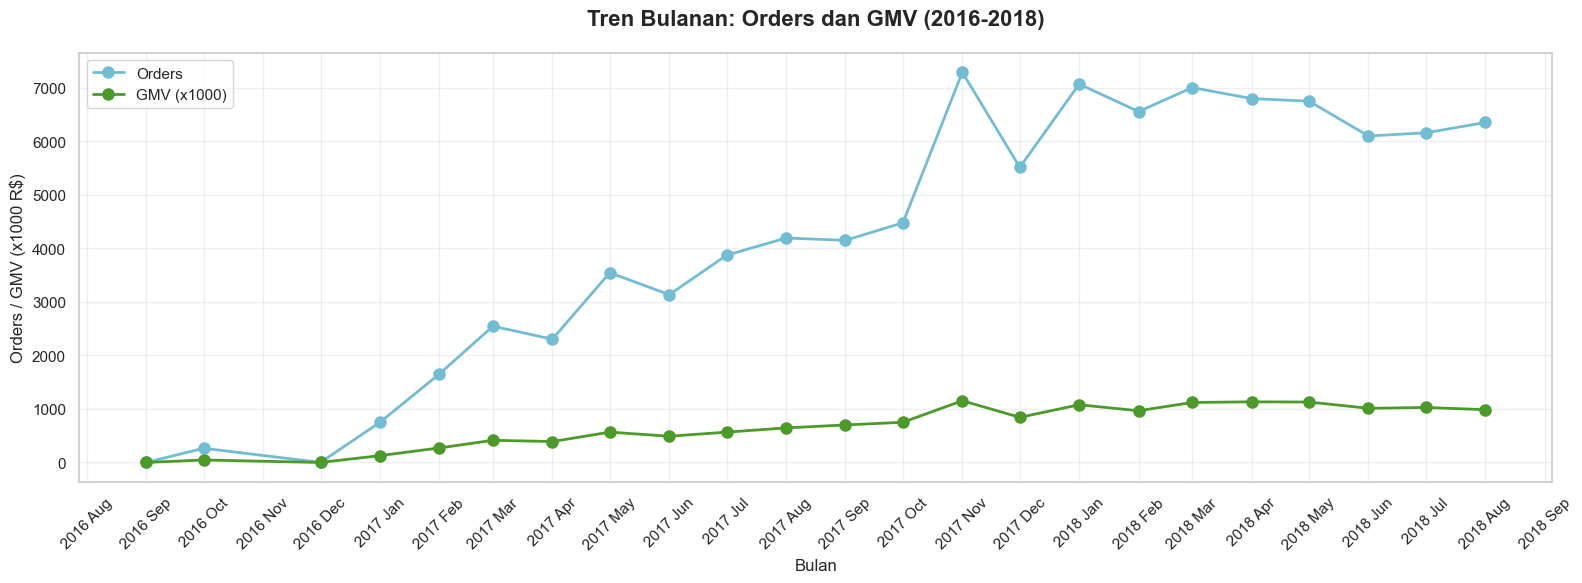

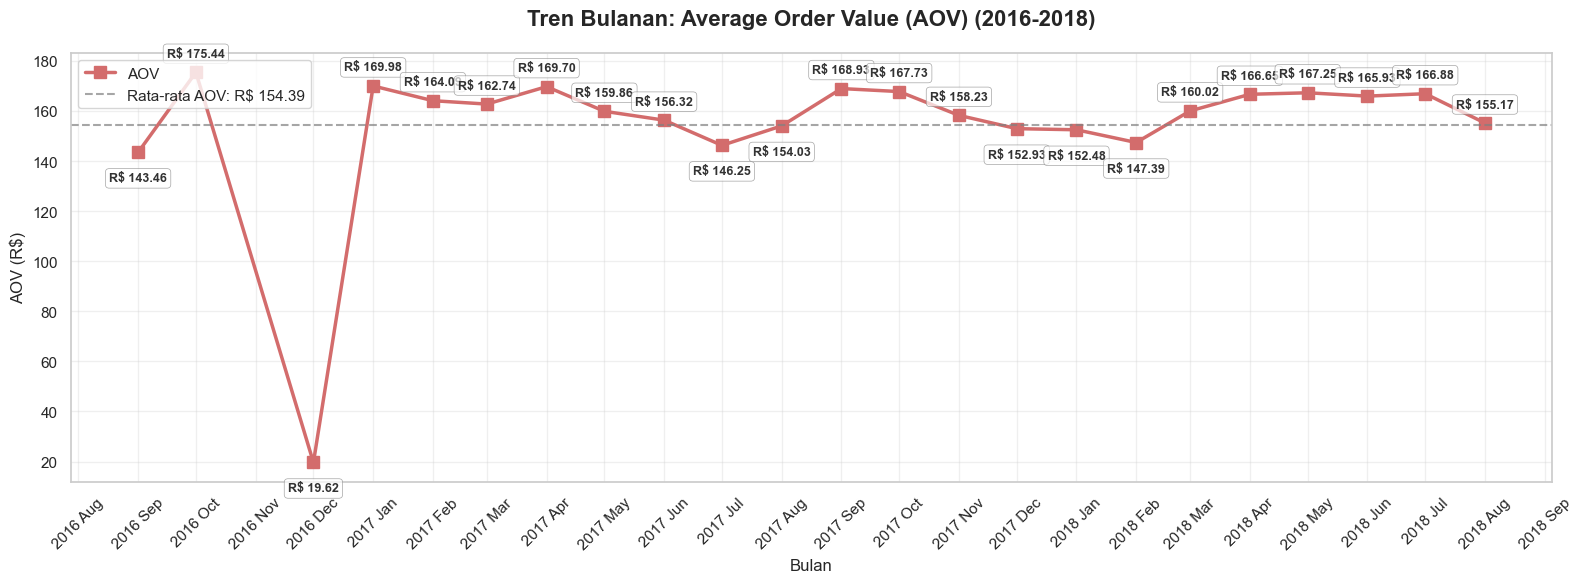

In [32]:
# Visualisasi 1: Orders dan GMV
fig, ax1 = plt.subplots(figsize=(16, 6))

# Plot Orders dan GMV
ax1.plot(monthly_df['order_date'], monthly_df['orders'], marker='o', linewidth=2, color='#72BCD4', label='Orders', markersize=8)
ax1.plot(monthly_df['order_date'], monthly_df['gmv']/1000, marker='o', linewidth=2, color='#4C9A2A', label='GMV (x1000)', markersize=8)
ax1.set_xlabel('Bulan', fontsize=12)
ax1.set_ylabel('Orders / GMV (x1000 R$)', fontsize=12)

# Format x-axis: tampilkan semua bulan dengan format "Tahun Bulan"
ax1.xaxis.set_major_locator(MonthLocator())
ax1.xaxis.set_major_formatter(DateFormatter('%Y %b'))
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)
ax1.legend(loc='upper left', fontsize=11)

plt.title('Tren Bulanan: Orders dan GMV (2016-2018)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Visualisasi 2: AOV (Terpisah untuk clarity)
fig, ax = plt.subplots(figsize=(16, 6))

# Plot AOV
ax.plot(monthly_df['order_date'], monthly_df['aov'], marker='s', linewidth=2.5, color='#D36C6C', label='AOV', markersize=8)
ax.set_xlabel('Bulan', fontsize=12)
ax.set_ylabel('AOV (R$)', fontsize=12)

# Format x-axis: tampilkan semua bulan dengan format "Tahun Bulan"
ax.xaxis.set_major_locator(MonthLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y %b'))
ax.tick_params(axis='x', rotation=45)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=11)

# Tambahkan horizontal line untuk rata-rata AOV
avg_aov = monthly_df['aov'].mean()
ax.axhline(y=avg_aov, color='gray', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Rata-rata AOV: R$ {avg_aov:.2f}')
ax.legend(loc='upper left', fontsize=11)

# Tambahkan label nilai pada setiap titik
for idx, row in monthly_df.iterrows():
    # Tentukan posisi label (di atas atau di bawah titik tergantung posisi relatif terhadap rata-rata)
    offset = 5 if row['aov'] >= avg_aov else -8
    ax.text(row['order_date'], row['aov'] + offset, f"R$ {row['aov']:.2f}",
            ha='center', va='bottom' if row['aov'] >= avg_aov else 'top',
            fontsize=9, fontweight='bold', color='#333333',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.7, edgecolor='gray', linewidth=0.5))

plt.title('Tren Bulanan: Average Order Value (AOV) (2016-2018)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


**📝 Insight Visualisasi Tren Bulanan:**

**Apa yang Ditampilkan dalam Visualisasi:**

Visualisasi ini menampilkan dua chart yang menggambarkan performa bisnis dari waktu ke waktu:

1. **Chart Orders & GMV**: Menunjukkan tren volume transaksi (Orders) dan total pendapatan (GMV) secara bersamaan untuk melihat korelasi antara volume dan pendapatan
2. **Chart AOV (Average Order Value)**: Menampilkan nilai rata-rata per transaksi dengan garis referensi rata-rata untuk mengidentifikasi bulan yang berada di atas atau di bawah standar

**Temuan Utama:**

**1. Pertumbuhan Bisnis yang Eksponensial - Sukses Ekspansi Pasar**

Visualisasi menunjukkan pertumbuhan bisnis yang sangat signifikan dari periode awal (2016) hingga periode puncak (2017-2018). Volume orders meningkat dari ratusan di awal periode menjadi ribuan di periode selanjutnya, dengan **pertumbuhan rata-rata bulanan mencapai 48.89%**.

**Puncak Performa**: November 2017 menjadi bulan terbaik dengan 7,544 orders dan GMV R$ 1,179,144, menunjukkan bahwa platform berhasil mencapai skala yang signifikan dalam waktu relatif singkat.

**Implikasi Bisnis**: Pertumbuhan ini menunjukkan bahwa strategi ekspansi pasar berhasil. Platform telah berhasil menarik pelanggan baru dan meningkatkan aktivitas transaksi secara konsisten. Ini adalah indikator positif untuk investasi dan pengembangan lebih lanjut.

**2. GMV Mengikuti Pola Orders - Model Bisnis yang Sehat**

Visualisasi menunjukkan bahwa GMV mengikuti pola yang sama dengan orders, dengan pertumbuhan rata-rata bulanan 49.42%. Ini berarti setiap peningkatan volume orders diikuti dengan peningkatan pendapatan yang proporsional.

**Implikasi Bisnis**: Ini menunjukkan model bisnis yang sehat - tidak ada indikasi penurunan nilai transaksi yang tidak proporsional. Platform berhasil mempertahankan nilai transaksi sambil meningkatkan volume, yang merupakan kombinasi ideal untuk pertumbuhan berkelanjutan.

**3. Penurunan AOV yang Signifikan - Trade-off Volume vs Nilai**

Visualisasi AOV mengungkapkan penurunan yang signifikan dari periode awal ke periode selanjutnya. AOV turun dari R$ 175.44 (Oktober 2016) menjadi R$ 147.39 (Februari 2018), atau **penurunan sebesar ~16%**.

**Pola Trade-off yang Jelas**: Terdapat korelasi negatif yang jelas antara volume orders dan AOV. Bulan dengan volume tertinggi (Januari 2018: 7,069 orders) memiliki AOV lebih rendah (R$ 152.48), sementara bulan dengan AOV tertinggi (Oktober 2016: R$ 175.44) memiliki volume lebih rendah (265 orders).

**Penyebab Potensial Penurunan AOV**:
- **Ekspansi Pasar**: Masuknya pelanggan baru dengan daya beli lebih rendah atau preferensi produk dengan harga lebih terjangkau
- **Diversifikasi Produk**: Penambahan produk dengan harga lebih rendah untuk menarik pelanggan baru
- **Strategi Promosi**: Kampanye diskon yang agresif untuk meningkatkan volume

**Implikasi Bisnis**: Penurunan AOV sebesar 16% perlu dievaluasi apakah ini trade-off yang acceptable untuk pertumbuhan volume. Meskipun total GMV meningkat karena volume yang lebih tinggi, penurunan AOV dapat mempengaruhi profitabilitas jika margin profit lebih rendah pada produk dengan harga lebih rendah. Perlu strategi untuk:
- Meningkatkan AOV kembali tanpa mengorbankan volume (upselling, cross-selling, bundling)
- Mempertahankan pelanggan dengan nilai transaksi tinggi sambil tetap menarik pelanggan baru
- Evaluasi mix produk untuk memastikan keseimbangan antara volume dan nilai

**4. Stabilitas AOV Setelah Penurunan Awal - Normalisasi Pasar**

Meskipun ada penurunan signifikan dari periode awal, visualisasi menunjukkan bahwa AOV relatif stabil di periode 2017-2018, berkisar antara R$ 145-175. Ini menunjukkan bahwa setelah penurunan awal, nilai transaksi rata-rata cenderung stabil.

**Implikasi Bisnis**: Stabilitas AOV setelah penurunan awal menunjukkan bahwa pasar telah mencapai titik keseimbangan. Platform telah berhasil menstabilkan nilai transaksi sambil mempertahankan volume tinggi. Ini adalah indikator positif bahwa model bisnis telah matang.

**5. Potensi Pola Musiman - Peluang Kampanye Khusus**

Visualisasi menunjukkan peningkatan aktivitas di akhir tahun (Q4 2017), dengan November 2017 sebagai bulan puncak. Meskipun tidak ada pola musiman yang sangat jelas dan konsisten, peningkatan di akhir tahun menunjukkan potensi untuk kampanye khusus periode liburan.

**Implikasi Bisnis**: November 2017 dengan 7,544 orders dan GMV R$ 1,179,144 menunjukkan potensi besar untuk kampanye marketing dan optimasi inventory di periode yang sama tahun berikutnya. Platform dapat mempersiapkan kampanye khusus liburan untuk memaksimalkan performa di periode ini.

**Kesimpulan untuk Stakeholder:**

1. **Pertumbuhan yang Sukses**: Platform menunjukkan pertumbuhan eksponensial dengan pertumbuhan rata-rata bulanan hampir 50% untuk orders dan GMV. Ini adalah indikator yang sangat positif untuk investasi dan pengembangan lebih lanjut.

2. **Model Bisnis Sehat**: GMV mengikuti pola orders dengan proporsi yang sehat, menunjukkan model bisnis yang sustainable dan tidak bergantung pada inflasi harga untuk pertumbuhan.

3. **Perhatian pada AOV**: Penurunan AOV sebesar 16% perlu mendapat perhatian khusus. Meskipun total GMV meningkat, perlu strategi untuk meningkatkan AOV kembali tanpa mengorbankan volume untuk memastikan profitabilitas jangka panjang.

4. **Stabilitas yang Dicapai**: AOV telah stabil di periode 2017-2018, menunjukkan bahwa platform telah mencapai keseimbangan pasar. Fokus selanjutnya adalah optimasi untuk meningkatkan AOV sambil mempertahankan volume.

5. **Peluang Musiman**: Peningkatan aktivitas di Q4 2017 menunjukkan potensi untuk kampanye khusus liburan. Platform harus mempersiapkan strategi marketing dan inventory untuk memaksimalkan performa di periode yang sama tahun berikutnya.


### 📦 **Pertanyaan 2: Analisis Kategori Produk**
1. **Bar Chart**: Top 10 Kategori berdasarkan GMV
2. **Bar Chart**: Top 10 Kategori berdasarkan Volume Order
3. **Bar Chart**: Freight Ratio untuk Top 10 Kategori GMV (dengan threshold)
4. **Bar Chart**: Top 10 Kategori dengan Freight Ratio Tertinggi

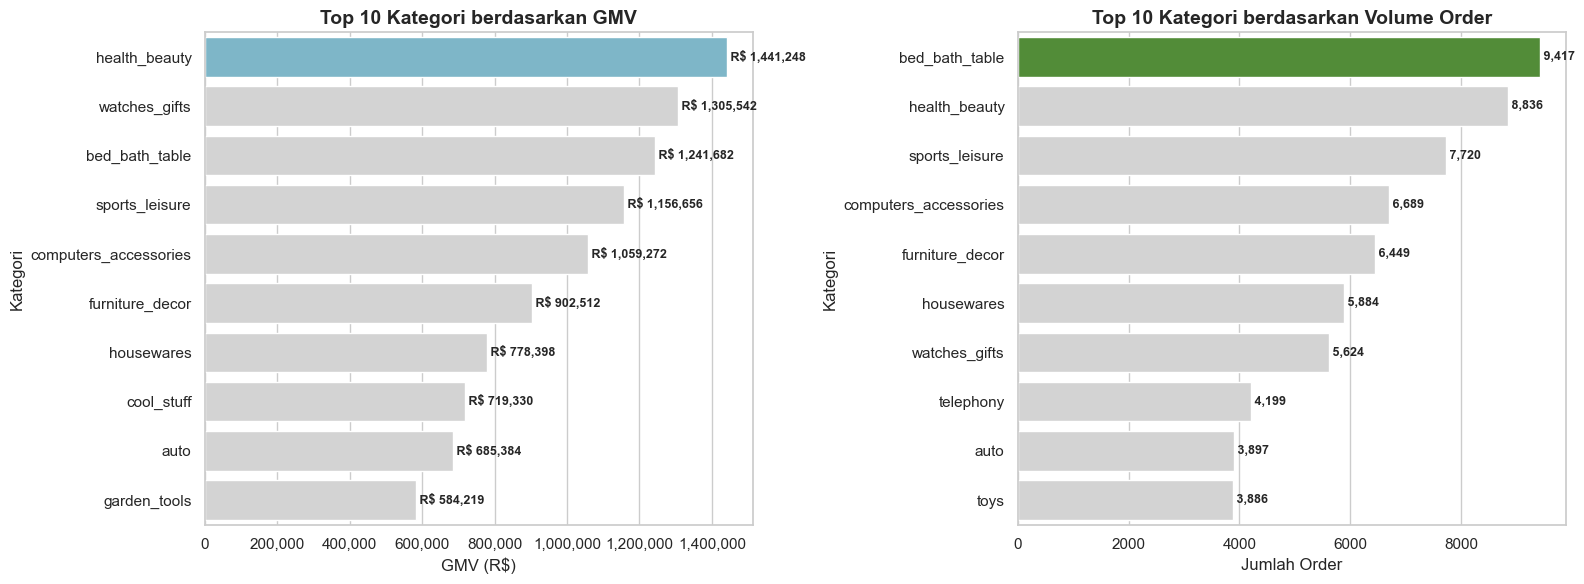

/var/folders/_0/7ypff5nd6w5fkn39tvbryw2m0000gn/T/ipykernel_21528/168693355.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=high_freight, x='freight_ratio_pct', y='product_category_en',


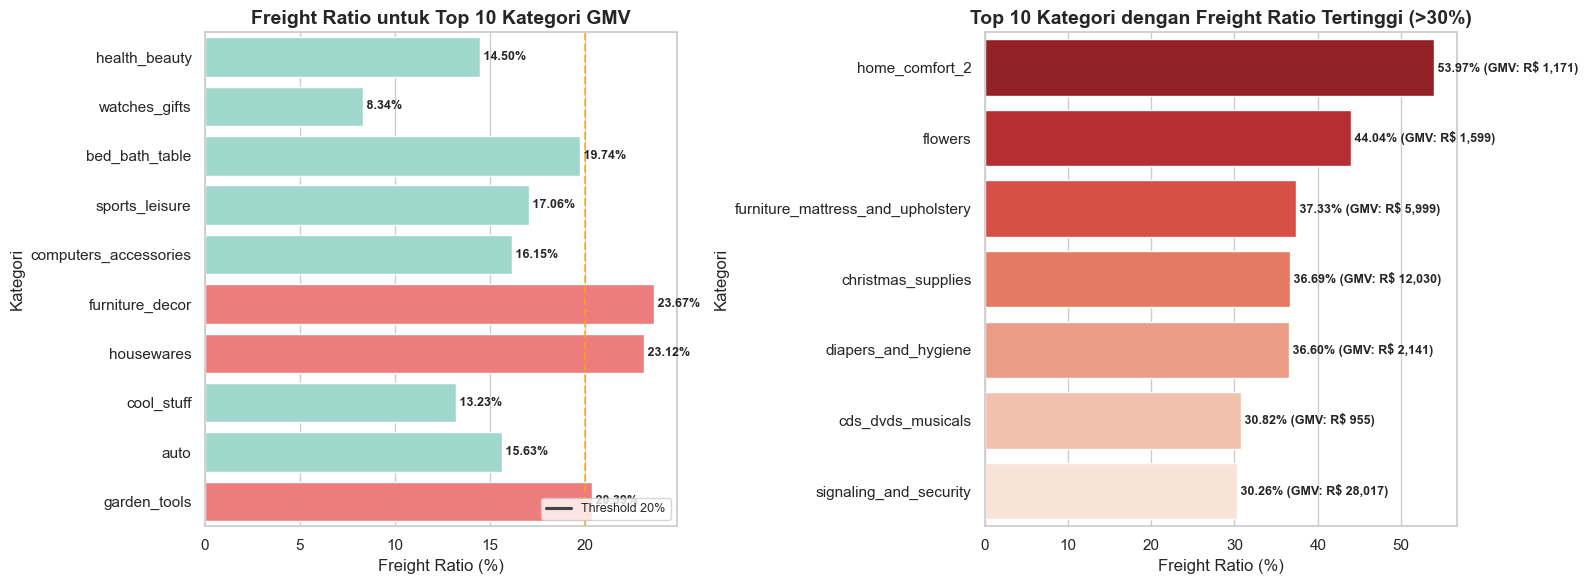

In [33]:
# Visualisasi 1: Top 10 Kategori berdasarkan GMV dan Volume
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Top 10 Kategori berdasarkan GMV
plot_df = top_categories_gmv.copy()
plot_df['is_top'] = plot_df.index == 0  # Highlight kategori teratas

sns.barplot(data=plot_df, x='item_gmv', y='product_category_en',
            hue='is_top', palette={True: '#72BCD4', False: '#D3D3D3'},
            legend=False, ax=axes[0])
axes[0].set_title('Top 10 Kategori berdasarkan GMV', fontsize=14, fontweight='bold')
axes[0].set_xlabel('GMV (R$)', fontsize=12)
axes[0].set_ylabel('Kategori', fontsize=12)
axes[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Tambahkan label nilai GMV pada setiap bar
for i, (idx, row) in enumerate(plot_df.iterrows()):
    axes[0].text(row['item_gmv'], i, f" R$ {row['item_gmv']:,.0f}",
                va='center', fontsize=9, fontweight='bold')

# Plot 2: Top 10 Kategori berdasarkan Volume
plot_vol = category_agg.sort_values('orders', ascending=False).head(10).reset_index(drop=True)
plot_vol['is_top'] = plot_vol.index == 0  # Highlight kategori teratas

sns.barplot(data=plot_vol, x='orders', y='product_category_en',
            hue='is_top', palette={True: '#4C9A2A', False: '#D3D3D3'},
            legend=False, ax=axes[1])
axes[1].set_title('Top 10 Kategori berdasarkan Volume Order', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Jumlah Order', fontsize=12)
axes[1].set_ylabel('Kategori', fontsize=12)

# Tambahkan label nilai orders pada setiap bar
for i, (idx, row) in enumerate(plot_vol.iterrows()):
    axes[1].text(row['orders'], i, f" {row['orders']:,.0f}",
                va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Visualisasi 2: Freight Ratio (Terpisah untuk clarity)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Freight Ratio untuk Top 10 Kategori GMV
plot_fr_gmv = top_categories_gmv.copy()
plot_fr_gmv['freight_ratio_pct'] = plot_fr_gmv['freight_ratio'] * 100  # Convert ke persentase
plot_fr_gmv['is_high_fr'] = plot_fr_gmv['freight_ratio'] > 0.2  # Highlight FR > 20%

sns.barplot(data=plot_fr_gmv, x='freight_ratio_pct', y='product_category_en',
            hue='is_high_fr', palette={True: '#FF6B6B', False: '#95E1D3'},
            legend=False, ax=axes[0])
axes[0].set_title('Freight Ratio untuk Top 10 Kategori GMV', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Freight Ratio (%)', fontsize=12)
axes[0].set_ylabel('Kategori', fontsize=12)

# Tambahkan label nilai freight ratio pada setiap bar
for i, (idx, row) in enumerate(plot_fr_gmv.iterrows()):
    axes[0].text(row['freight_ratio_pct'], i, f" {row['freight_ratio_pct']:.2f}%",
                va='center', fontsize=9, fontweight='bold')

# Tambahkan garis threshold 20%
axes[0].axvline(x=20, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Threshold 20%')
axes[0].legend(['Threshold 20%'], loc='lower right', fontsize=9)

# Plot 2: Top 10 Kategori dengan Freight Ratio Tertinggi
high_freight = category_agg[category_agg['freight_ratio'] > 0.3].sort_values('freight_ratio', ascending=False).head(10).reset_index(drop=True)
high_freight['freight_ratio_pct'] = high_freight['freight_ratio'] * 100

sns.barplot(data=high_freight, x='freight_ratio_pct', y='product_category_en',
            palette='Reds_r', ax=axes[1])
axes[1].set_title('Top 10 Kategori dengan Freight Ratio Tertinggi (>30%)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Freight Ratio (%)', fontsize=12)
axes[1].set_ylabel('Kategori', fontsize=12)

# Tambahkan label nilai freight ratio dan GMV pada setiap bar
for i, (idx, row) in enumerate(high_freight.iterrows()):
    axes[1].text(row['freight_ratio_pct'], i, f" {row['freight_ratio_pct']:.2f}% (GMV: R$ {row['item_gmv']:,.0f})",
                va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


**📝 Insight Visualisasi Kategori Produk:**

**Apa yang Ditampilkan dalam Visualisasi:**

Visualisasi ini menampilkan tiga analisis utama untuk memahami performa kategori produk:

1. **Top 10 Kategori berdasarkan GMV (Gross Merchandise Value)**: Menunjukkan kategori produk yang memberikan kontribusi pendapatan tertinggi
2. **Top 10 Kategori berdasarkan Volume Order**: Menampilkan kategori yang paling populer berdasarkan jumlah transaksi
3. **Analisis Freight Ratio**: Mengukur proporsi biaya pengiriman terhadap harga produk untuk mengidentifikasi kategori dengan ongkir yang tinggi

**Temuan Utama:**

**1. Kategori Pilar Bisnis - Health & Beauty dan Bed, Bath & Table**

Dari visualisasi terlihat bahwa **Health & Beauty** merupakan kategori dengan kontribusi GMV tertinggi (R$ 1,441,248.07) dan juga masuk peringkat kedua untuk volume order (8,836 orders). Ini menunjukkan bahwa kategori ini tidak hanya menghasilkan pendapatan tinggi, tetapi juga sangat populer di kalangan pelanggan.

Sementara itu, **Bed, Bath & Table** memiliki volume order tertinggi (9,417 orders) dan juga masuk top 3 untuk GMV (R$ 1,241,681.72). Kategori ini adalah yang paling populer dan tetap memberikan nilai transaksi yang solid.

**Implikasi Bisnis**: Kedua kategori ini adalah pilar utama bisnis yang harus dipertahankan dan dikembangkan. Health & Beauty menunjukkan kombinasi optimal antara nilai dan popularitas, sementara Bed, Bath & Table menunjukkan loyalitas pelanggan yang tinggi.

**2. Kategori Efisien - Watches & Gifts**

**Watches & Gifts** berada di posisi kedua untuk GMV (R$ 1,305,541.61) dengan freight ratio terendah (8.34%) di antara top 10 kategori. Ini berarti kategori ini memiliki efisiensi logistik yang sangat baik - ongkir rendah relatif terhadap nilai produk, sehingga total biaya bagi pelanggan lebih kompetitif.

**Implikasi Bisnis**: Kategori ini dapat dijadikan model untuk kategori lain karena menunjukkan bahwa produk bernilai tinggi dapat dikirim dengan biaya rendah. Ini juga menunjukkan daya tarik harga yang kompetitif, yang dapat meningkatkan konversi penjualan.

**3. Pola Korelasi Positif antara Popularitas dan Nilai**

Visualisasi menunjukkan bahwa 5 dari 5 kategori dengan volume tertinggi juga masuk dalam 5 besar kategori dengan GMV tertinggi. Ini mengindikasikan korelasi positif yang kuat: kategori yang populer cenderung juga menghasilkan pendapatan tinggi.

**Implikasi Bisnis**: Strategi fokus pada kategori populer akan secara alami mendorong peningkatan pendapatan. Tidak perlu trade-off antara volume dan nilai - kategori yang populer juga bernilai tinggi.

**4. Kategori dengan Ongkir Tinggi - Potensi Risiko Konversi**

Visualisasi freight ratio mengungkapkan bahwa beberapa kategori memiliki ongkir yang sangat tinggi relatif terhadap harga produk:

- **Home Comfort 2**: Ongkir mencapai 53.97% dari harga produk - lebih dari setengah harga produk itu sendiri
- **Flowers**: Ongkir 44.04%, kemungkinan karena memerlukan pengiriman khusus
- **Furniture Mattress & Upholstery**: Ongkir 37.33%, karena dimensi dan berat produk besar

**Implikasi Bisnis**: Ongkir yang tinggi dapat menjadi barrier bagi pelanggan karena total biaya menjadi lebih mahal. Kategori dengan freight ratio di atas 30% berpotensi mengalami penurunan konversi karena pelanggan mungkin merasa total biaya terlalu mahal. Perlu strategi khusus seperti:
- Program free shipping untuk kategori tertentu
- Negosiasi tarif kurir yang lebih kompetitif
- Bundling produk untuk meningkatkan nilai transaksi per order

**5. Threshold 20% - Titik Perhatian**

Visualisasi menunjukkan threshold 20% untuk freight ratio. Kategori dengan freight ratio di atas 20% (seperti Furniture & Decor dengan 23.67%) perlu mendapat perhatian khusus karena ongkir mulai signifikan mempengaruhi total biaya pelanggan.

**Kesimpulan:**

1. **Fokus Pengembangan**: Prioritaskan Health & Beauty dan Bed, Bath & Table sebagai kategori pilar yang sudah terbukti menghasilkan pendapatan tinggi dan populer
2. **Model Efisiensi**: Gunakan Watches & Gifts sebagai benchmark untuk kategori lain dalam hal efisiensi logistik
3. **Mitigasi Risiko**: Kategori dengan freight ratio > 30% memerlukan intervensi strategis untuk mencegah penurunan konversi akibat ongkir yang terlalu tinggi
4. **Strategi Growth**: Manfaatkan korelasi positif antara popularitas dan nilai - fokus pada kategori populer akan mendorong pertumbuhan pendapatan


### 👥 **Pertanyaan 3: RFM Analysis - Segmentasi Pelanggan**
1. **Metrics Summary**: Rata-rata Recency, Frequency, Monetary
2. **Bar Chart**: Top 5 Customers by Recency
3. **Bar Chart**: Top 5 Customers by Frequency
4. **Bar Chart**: Top 5 Customers by Monetary
5. **Bar Chart**: Distribusi Customer Segment
6. **Pie Chart**: Proporsi Customer Segment

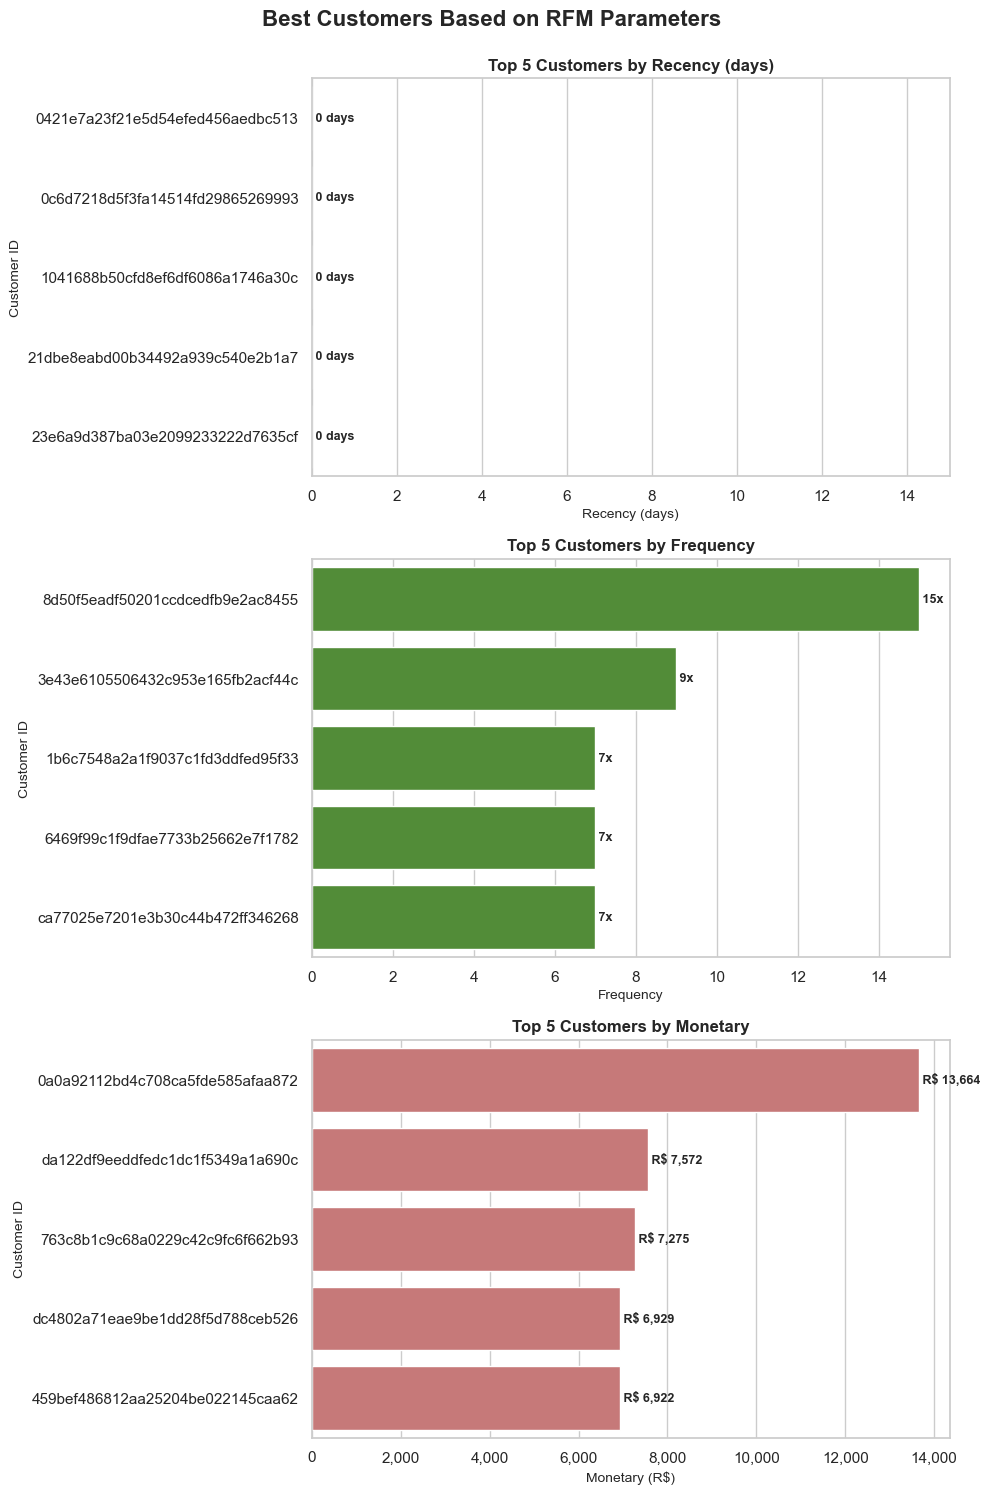

In [34]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Top 5 by Recency
top_recency = rfm_df.nsmallest(5, 'recency').reset_index(drop=True)
top_recency['dummy'] = 1  # Dummy column untuk hue
sns.barplot(data=top_recency, x='recency', y='customer_unique_id',
            hue='dummy', palette=['#72BCD4'], legend=False, ax=axes[0])
axes[0].set_title('Top 5 Customers by Recency (days)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Recency (days)', fontsize=10)
axes[0].set_ylabel('Customer ID', fontsize=10)
axes[0].set_xlim(0, 15)

# Tambahkan label angka pada setiap bar (Recency)
for i, (idx, row) in enumerate(top_recency.iterrows()):
    axes[0].text(row['recency'], i, f" {row['recency']:.0f} days",
                va='center', fontsize=9, fontweight='bold')

# Plot 2: Top 5 by Frequency
top_frequency = rfm_df.nlargest(5, 'frequency').reset_index(drop=True)
top_frequency['dummy'] = 1  # Dummy column untuk hue
sns.barplot(data=top_frequency, x='frequency', y='customer_unique_id',
            hue='dummy', palette=['#4C9A2A'], legend=False, ax=axes[1])
axes[1].set_title('Top 5 Customers by Frequency', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Frequency', fontsize=10)
axes[1].set_ylabel('Customer ID', fontsize=10)

# Tambahkan label angka pada setiap bar (Frequency)
for i, (idx, row) in enumerate(top_frequency.iterrows()):
    axes[1].text(row['frequency'], i, f" {row['frequency']:.0f}x",
                va='center', fontsize=9, fontweight='bold')

# Plot 3: Top 5 by Monetary
top_monetary = rfm_df.nlargest(5, 'monetary').reset_index(drop=True)
top_monetary['dummy'] = 1  # Dummy column untuk hue
sns.barplot(data=top_monetary, x='monetary', y='customer_unique_id',
            hue='dummy', palette=['#D36C6C'], legend=False, ax=axes[2])
axes[2].set_title('Top 5 Customers by Monetary', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Monetary (R$)', fontsize=10)
axes[2].set_ylabel('Customer ID', fontsize=10)
axes[2].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))

# Tambahkan label angka pada setiap bar (Monetary)
for i, (idx, row) in enumerate(top_monetary.iterrows()):
    axes[2].text(row['monetary'], i, f" R$ {row['monetary']:,.0f}",
                va='center', fontsize=9, fontweight='bold')

plt.suptitle('Best Customers Based on RFM Parameters', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

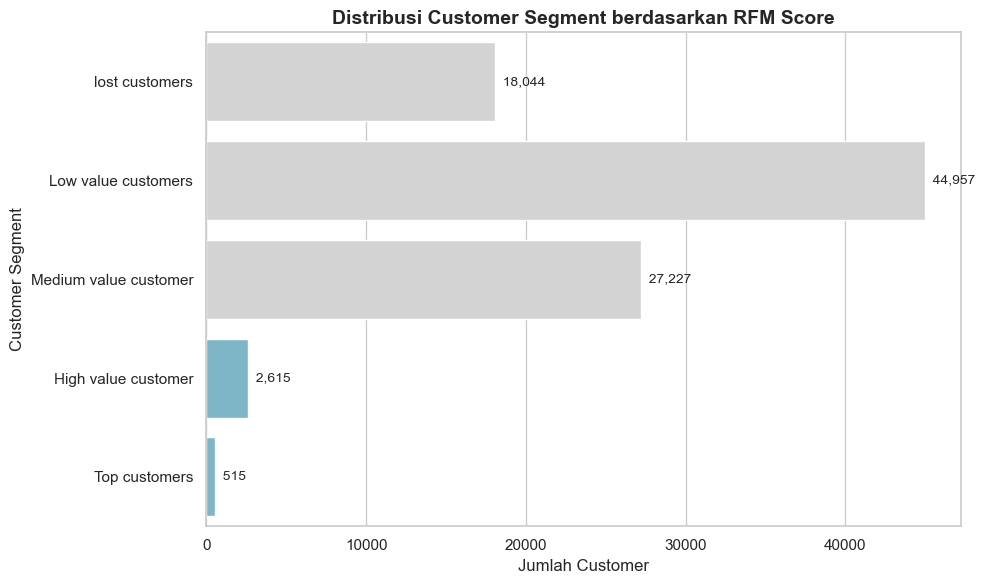

In [35]:
# Distribusi Customer Segment
segment_order = ["lost customers", "Low value customers", "Medium value customer",
                 "High value customer", "Top customers"]
customer_segment_df['customer_segment'] = pd.Categorical(
    customer_segment_df['customer_segment'],
    categories=segment_order,
    ordered=True
)
customer_segment_df = customer_segment_df.sort_values('customer_segment')

# Buat kolom untuk menentukan warna berdasarkan segment
customer_segment_df['segment_type'] = customer_segment_df['customer_segment'].apply(
    lambda x: 'Premium' if x in ['Top customers', 'High value customer'] else 'Standard'
)

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=customer_segment_df, x='customer_count', y='customer_segment',
            hue='segment_type', palette={'Premium': '#72BCD4', 'Standard': '#D3D3D3'},
            legend=False, ax=ax)
ax.set_title('Distribusi Customer Segment berdasarkan RFM Score', fontsize=14, fontweight='bold')
ax.set_xlabel('Jumlah Customer', fontsize=12)
ax.set_ylabel('Customer Segment', fontsize=12)

# Anotasi nilai
for i, v in enumerate(customer_segment_df['customer_count']):
    ax.text(v, i, f"  {v:,}", va='center', fontsize=10)

plt.tight_layout()
plt.show()


**📝 Insight Visualisasi RFM:**

**Apa yang Ditampilkan dalam Visualisasi:**

Visualisasi ini menampilkan analisis RFM (Recency, Frequency, Monetary) untuk segmentasi pelanggan:

1. **Top 5 Customers by Recency, Frequency, dan Monetary**: Menunjukkan pelanggan terbaik di masing-masing dimensi RFM untuk mengidentifikasi karakteristik pelanggan bernilai tinggi
2. **Distribusi Customer Segment**: Menampilkan proporsi pelanggan di setiap segment (Top customers, High value, Medium value, Low value, Lost customers) untuk memahami komposisi basis pelanggan

**Temuan Utama:**

**1. Mayoritas Pelanggan Berada di Segment Rendah - Peluang Besar untuk Peningkatan**

Visualisasi distribusi segment menunjukkan bahwa **77.5% pelanggan** berada di kategori Low value (48.2%) dan Lost customers (19.3%). Ini berarti hampir 4 dari 5 pelanggan memiliki nilai transaksi rendah atau sudah tidak aktif dalam waktu lama.

**Implikasi Bisnis**: Ini adalah peluang besar untuk meningkatkan engagement dan nilai pelanggan. Dengan strategi yang tepat, platform dapat mengkonversi sebagian besar pelanggan ini ke segment yang lebih tinggi, yang akan secara signifikan meningkatkan pendapatan. Investasi dalam program reaktivasi dan peningkatan nilai pelanggan dapat memberikan ROI yang tinggi.

**2. Segment Premium Kecil tapi Sangat Berharga - Prioritas Retensi**

Hanya **3.4% pelanggan** yang berada di kategori Top/High value, namun segment ini sangat berharga:
- **Top customers** (539 pelanggan, 0.6%): Recency rata-rata 141.4 hari, frequency 2.34x, monetary R$ 611.38
- **High value customers** (2,702 pelanggan, 2.8%): Recency 175.9 hari, frequency 1.46x, monetary R$ 664.50

**Implikasi Bisnis**: Segment ini adalah aset berharga yang perlu dijaga dengan program retensi khusus. Meskipun jumlahnya kecil, mereka memberikan kontribusi signifikan terhadap pendapatan. Program VIP, early access, atau benefit eksklusif dapat membantu mempertahankan segment ini. Kehilangan pelanggan di segment ini akan berdampak besar pada pendapatan.

**3. Lost Customers - Potensi Reaktivasi yang Signifikan**

**Lost customers** (18,561 pelanggan, 19.3%) memiliki recency sangat tinggi (351.4 hari - hampir 1 tahun tidak aktif) dengan nilai transaksi sangat rendah (R$ 39.62). Ini menunjukkan pelanggan yang sudah lama tidak melakukan transaksi.

**Implikasi Bisnis**: Segment ini memerlukan strategi reaktivasi yang agresif. Kampanye "come back" dengan diskon khusus, email marketing yang personal, atau program win-back dapat membantu mengembalikan pelanggan ini. Meskipun nilai transaksi mereka rendah, jumlahnya yang besar (hampir 20% dari total pelanggan) membuat mereka menjadi target yang berharga untuk reaktivasi.

**4. Low Value Customers - Potensi Peningkatan Melalui Engagement**

**Low value customers** (46,292 pelanggan, 48.2%) menunjukkan frekuensi pembelian sangat rendah (1.01x - hampir hanya sekali beli) dengan nilai transaksi rendah (R$ 98.05). Ini adalah segment terbesar yang menunjukkan pelanggan yang baru sekali beli atau jarang berbelanja.

**Implikasi Bisnis**: Segment ini memiliki potensi besar untuk ditingkatkan melalui strategi engagement dan upselling. Program seperti:
- Email marketing dengan rekomendasi produk personal
- Program loyalty untuk mendorong repeat purchase
- Cross-selling dan upselling saat checkout
- Kampanye khusus untuk meningkatkan frekuensi pembelian

Dengan meningkatkan frekuensi pembelian dari 1x menjadi 2-3x, segment ini dapat memberikan peningkatan pendapatan yang signifikan.

**5. Medium Value Customers - Jembatan Menuju Segment Premium**

**Medium value customers** (28,002 pelanggan, 29.1%) adalah segment terbesar kedua dengan nilai transaksi menengah (R$ 301.55) dan recency yang relatif baik (260.2 hari). Segment ini menunjukkan pelanggan yang sudah memiliki engagement yang baik tetapi belum mencapai level premium.

**Implikasi Bisnis**: Segment ini memiliki potensi untuk ditingkatkan ke High value segment melalui strategi upselling dan cross-selling. Mereka sudah menunjukkan loyalitas dan nilai transaksi yang solid, sehingga program yang tepat dapat mendorong mereka ke segment premium. Fokus pada:
- Rekomendasi produk dengan nilai lebih tinggi
- Program bundling untuk meningkatkan nilai transaksi
- Program loyalty yang memberikan insentif untuk transaksi lebih besar

**6. Pola Top Performers - Karakteristik Pelanggan Ideal**

Visualisasi Top 5 customers menunjukkan karakteristik pelanggan terbaik:
- **Recency rendah** (baru saja berbelanja) menunjukkan engagement tinggi
- **Frequency tinggi** menunjukkan loyalitas dan repeat purchase
- **Monetary tinggi** menunjukkan nilai transaksi yang besar

**Implikasi Bisnis**: Karakteristik ini dapat digunakan sebagai target untuk program pengembangan pelanggan. Platform dapat mengidentifikasi pelanggan dengan potensi untuk ditingkatkan ke level ini dan merancang program khusus untuk mereka.

**Kesimpulan untuk Stakeholder:**

1. **Fokus pada Retensi Segment Premium**: Prioritaskan program retensi untuk Top/High value customers (3.4% pelanggan) karena mereka memberikan kontribusi signifikan terhadap pendapatan meskipun jumlahnya kecil.

2. **Investasi dalam Reaktivasi**: Lost customers (19.3%) adalah target utama untuk program reaktivasi. Kampanye win-back yang efektif dapat mengembalikan hampir 1 dari 5 pelanggan ke aktivitas transaksi.

3. **Strategi Peningkatan Nilai**: Low value customers (48.2%) memerlukan strategi untuk meningkatkan frekuensi pembelian dan nilai transaksi. Program engagement yang tepat dapat mengkonversi segment terbesar ini ke segment yang lebih tinggi.

4. **Optimasi Medium Value**: Medium value customers (29.1%) adalah jembatan menuju segment premium. Program upselling dan cross-selling dapat mendorong mereka ke High value segment.

5. **Model Pelanggan Ideal**: Gunakan karakteristik Top 5 customers sebagai benchmark untuk program pengembangan pelanggan. Targetkan pelanggan dengan potensi untuk mencapai level ini.

6. **ROI Potensial**: Dengan strategi yang tepat, platform dapat meningkatkan proporsi pelanggan di segment premium dari 3.4% menjadi lebih tinggi, yang akan secara signifikan meningkatkan pendapatan dan profitabilitas jangka panjang.



### 🗺️ **Pertanyaan 4: Geospatial Analysis**
1. **Bar Chart**: Top 10 Kota Customer berdasarkan Order Count
2. **Bar Chart**: Top 10 Kota Seller berdasarkan Jumlah Seller
3. **Heatmap**: Peta Kepadatan Customer Transactions (interaktif)
4. **Heatmap**: Peta Kepadatan Seller Locations (interaktif)
5. **Metrics Summary**: Kota dengan Seller, Kota Tanpa Seller, Rata-rata Gap, Kota Gap Tinggi
6. **Bar Chart**: Top 20 Kota dengan Gap Supply-Demand Tertinggi
7. **Bar Chart**: Top 10 Kota Tanpa Seller (Peluang First-Mover)
8. **Bar Chart**: Perbandingan Orders vs Sellers (Top 10 Kota dengan Gap Tertinggi - Normalized)
9. **Bar Chart**: Distribusi Kategori Gap Supply-Demand
10. **Ringkasan Statistik**: Statistik lengkap gap supply-demand

In [ ]:
# Peta Heatmap Customer Transactions
# Koordinat Brazil (pusat): sekitar -14.2350, -51.9253
brazil_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4, tiles='OpenStreetMap')

# Siapkan data untuk heatmap (ambil sample untuk performa)
sample_customer = customer_transactions_geo.sample(min(5000, len(customer_transactions_geo)))
heat_data = [[row['geolocation_lat'], row['geolocation_lng'], row['order_count']]
             for idx, row in sample_customer.iterrows()]

# Tambahkan heatmap
HeatMap(heat_data, radius=15, blur=10, max_zoom=1).add_to(brazil_map)

# Tambahkan marker untuk top 10 kota
top_cities = customer_transactions_by_city.nlargest(10, 'order_count')
for idx, row in top_cities.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=10,
        popup=f"{row['customer_city']}, {row['customer_state']}<br>Orders: {row['order_count']:,}<br>GMV: R$ {row['order_gmv']:,.0f}",
        color='blue',
        fill=True,
        fillColor='blue'
    ).add_to(brazil_map)

brazil_map


In [37]:
# Peta Seller Locations
seller_map = folium.Map(location=[-14.2350, -51.9253], zoom_start=4, tiles='OpenStreetMap')

# Siapkan data untuk heatmap seller
sample_seller = seller_transactions_by_city.sample(min(2000, len(seller_transactions_by_city)))
seller_heat_data = [[row['geolocation_lat'], row['geolocation_lng'], row['seller_count']]
                     for idx, row in sample_seller.iterrows()]

# Tambahkan heatmap
HeatMap(seller_heat_data, radius=15, blur=10, max_zoom=1,
        gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}).add_to(seller_map)

# Tambahkan marker untuk top 10 kota seller
top_seller_cities = seller_transactions_by_city.nlargest(10, 'seller_count')
for idx, row in top_seller_cities.iterrows():
    folium.CircleMarker(
        location=[row['geolocation_lat'], row['geolocation_lng']],
        radius=10,
        popup=f"{row['seller_city']}, {row['seller_state']}<br>Sellers: {row['seller_count']:,}",
        color='green',
        fill=True,
        fillColor='green'
    ).add_to(seller_map)

seller_map


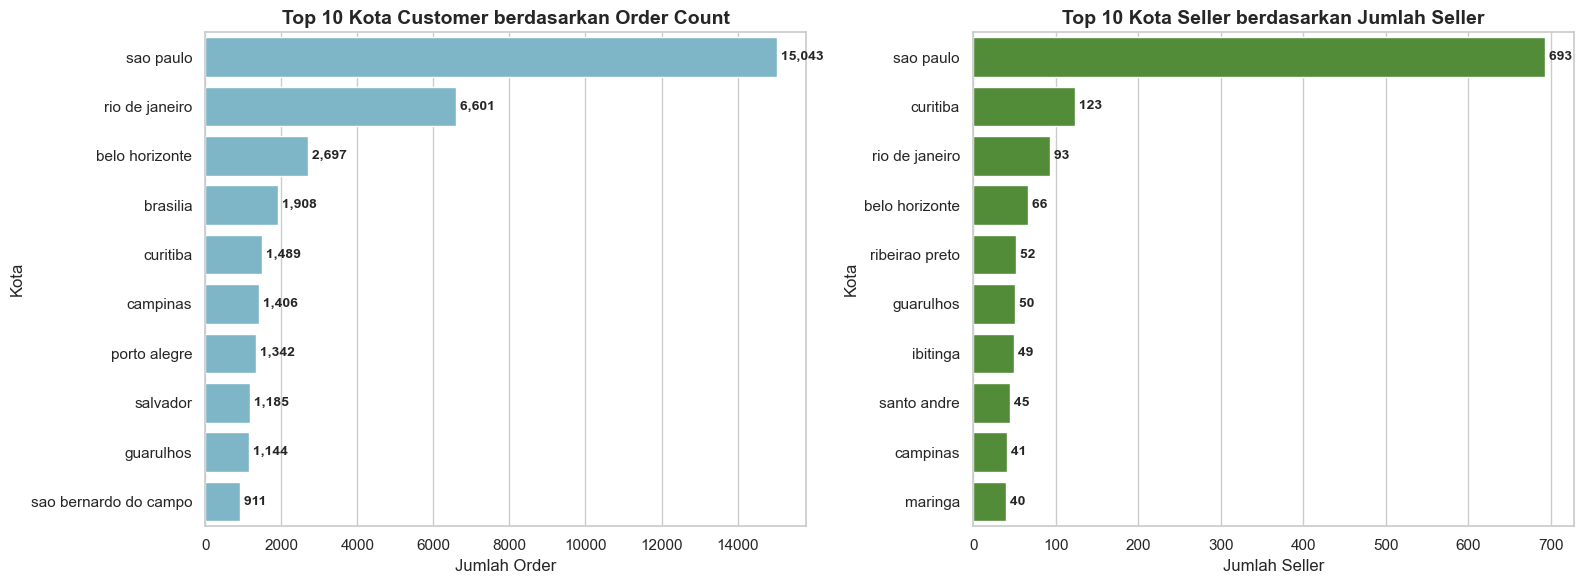

In [38]:
# Visualisasi Top 10 Kota Customer dan Seller (Bar Chart)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 Kota Customer
top_customer_cities = customer_transactions_by_city.nlargest(10, 'order_count').reset_index(drop=True)
top_customer_cities['dummy'] = 1  # Dummy column untuk hue
sns.barplot(data=top_customer_cities, x='order_count', y='customer_city',
            hue='dummy', palette=['#72BCD4'], legend=False, ax=axes[0])
axes[0].set_title('Top 10 Kota Customer berdasarkan Order Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Jumlah Order', fontsize=12)
axes[0].set_ylabel('Kota', fontsize=12)

# Tambahkan label angka pada setiap bar (Customer)
for i, (idx, row) in enumerate(top_customer_cities.iterrows()):
    axes[0].text(row['order_count'], i, f" {row['order_count']:,.0f}",
                va='center', fontsize=10, fontweight='bold')

# Top 10 Kota Seller
top_seller_cities = seller_transactions_by_city.nlargest(10, 'seller_count').reset_index(drop=True)
top_seller_cities['dummy'] = 1  # Dummy column untuk hue
sns.barplot(data=top_seller_cities, x='seller_count', y='seller_city',
            hue='dummy', palette=['#4C9A2A'], legend=False, ax=axes[1])
axes[1].set_title('Top 10 Kota Seller berdasarkan Jumlah Seller', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Jumlah Seller', fontsize=12)
axes[1].set_ylabel('Kota', fontsize=12)

# Tambahkan label angka pada setiap bar (Seller)
for i, (idx, row) in enumerate(top_seller_cities.iterrows()):
    axes[1].text(row['seller_count'], i, f" {row['seller_count']:,.0f}",
                va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


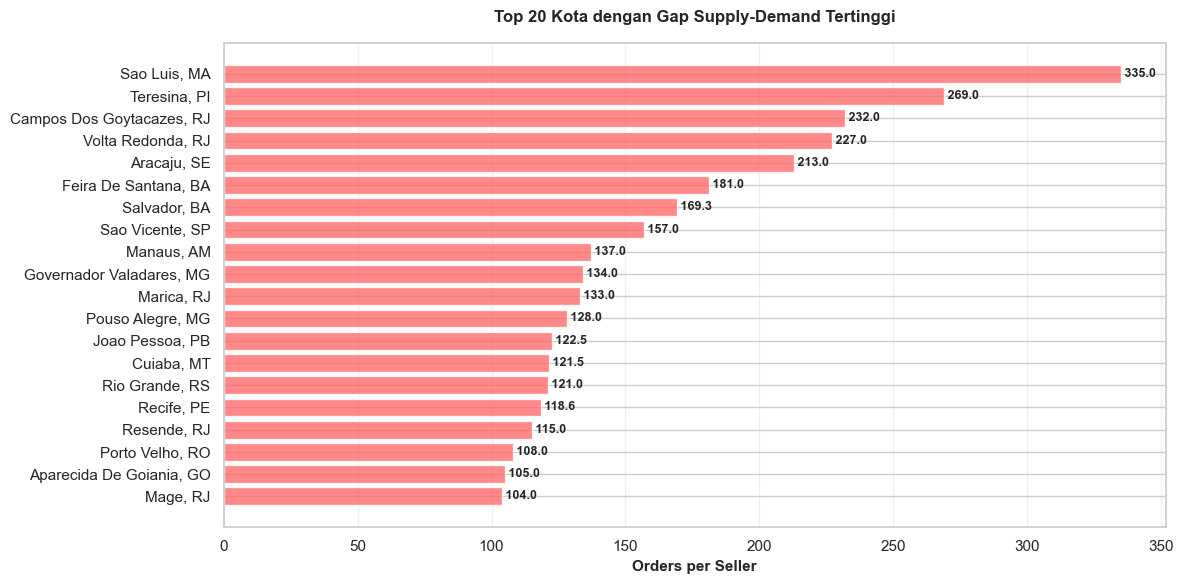

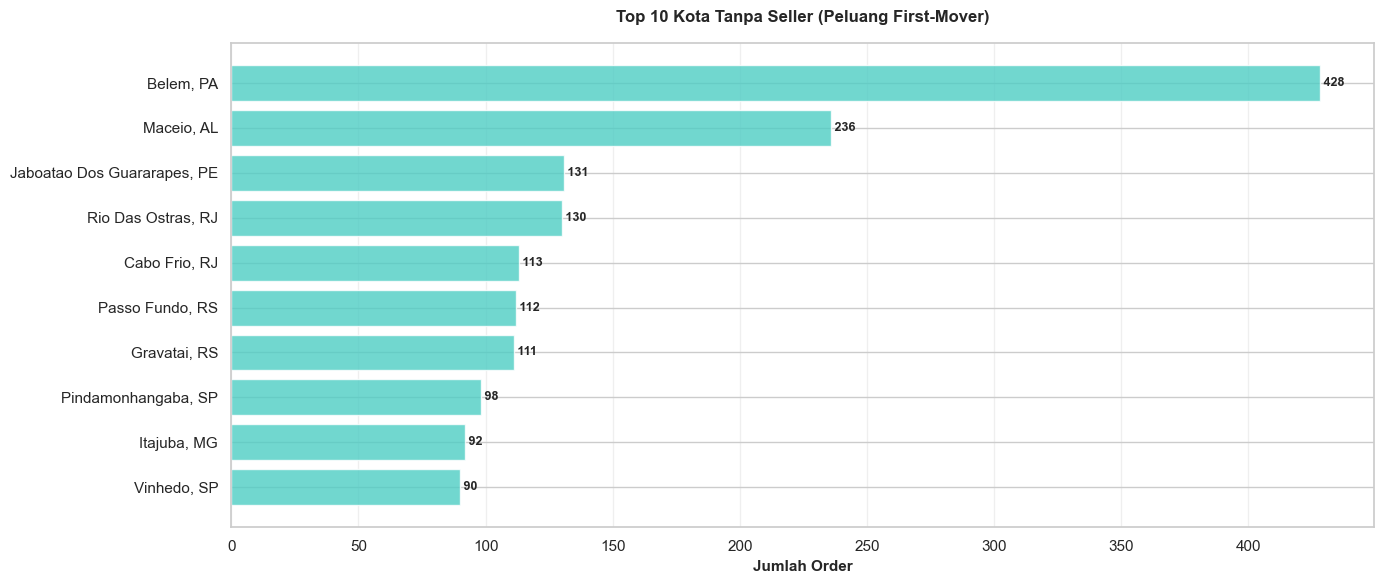

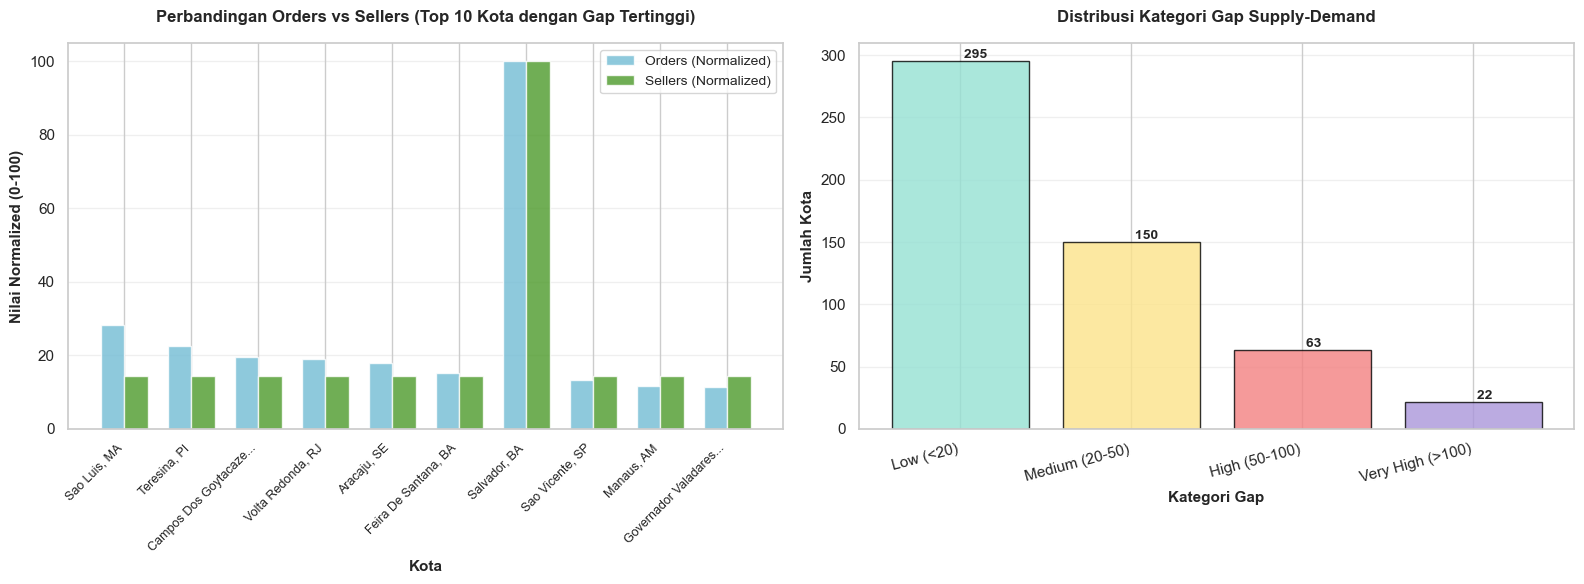


Ringkasan Visualisasi Gap Supply-Demand
Total 530 kota dengan seller dianalisis
3693 kota tanpa seller (peluang ekspansi)
Rata-rata gap: 28.83 orders/seller
85 kota dengan gap tinggi (>50)
22 kota dengan gap sangat tinggi (>100)


In [39]:
# Visualisasi Gap Supply-Demand per Kota

# Top 20 Kota dengan Gap Tertinggi
fig, axes = plt.subplots()

# Plot 1: Top 20 Kota dengan Gap Supply-Demand Tertinggi
gap_top20 = gap_with_sellers.head(20).reset_index(drop=True)
gap_top20['city_label'] = gap_top20['customer_city'].str.title() + ', ' + gap_top20['customer_state']

axes.barh(gap_top20['city_label'], gap_top20['orders_per_seller'],
                color='#FF6B6B', alpha=0.8)
axes.set_xlabel('Orders per Seller', fontsize=11, fontweight='bold')
axes.set_title('Top 20 Kota dengan Gap Supply-Demand Tertinggi',
                     fontsize=12, fontweight='bold', pad=15)
axes.grid(axis='x', alpha=0.3)
axes.invert_yaxis()

# Tambahkan label nilai
for i, (idx, row) in enumerate(gap_top20.iterrows()):
    axes.text(row['orders_per_seller'], i,
                   f" {row['orders_per_seller']:.1f}",
                   va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Top 10 Kota Tanpa Seller (Demand Tinggi)
fig, axes = plt.subplots(figsize=(14, 6))

gap_no_seller_top10 = gap_without_sellers.head(10).reset_index(drop=True)
gap_no_seller_top10['city_label'] = gap_no_seller_top10['customer_city'].str.title() + ', ' + gap_no_seller_top10['customer_state']

axes.barh(gap_no_seller_top10['city_label'], gap_no_seller_top10['order_count'],
                color='#4ECDC4', alpha=0.8)
axes.set_xlabel('Jumlah Order', fontsize=11, fontweight='bold')
axes.set_title('Top 10 Kota Tanpa Seller (Peluang First-Mover)',
                     fontsize=12, fontweight='bold', pad=15)
axes.grid(axis='x', alpha=0.3)
axes.invert_yaxis()

# Tambahkan label nilai
for i, (idx, row) in enumerate(gap_no_seller_top10.iterrows()):
    axes.text(row['order_count'], i,
                   f" {row['order_count']:,.0f}",
                   va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Visualisasi Tambahan: Comparison Chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 Kota - Orders vs Sellers Comparison
top10_gap = gap_with_sellers.head(10).reset_index(drop=True)
top10_gap['city_label'] = top10_gap['customer_city'].str.title() + ', ' + top10_gap['customer_state']

x = np.arange(len(top10_gap))
width = 0.35

# Normalize untuk comparison (scale orders dan sellers ke 0-100)
orders_normalized = (top10_gap['order_count'] / top10_gap['order_count'].max()) * 100
sellers_normalized = (top10_gap['seller_count'] / top10_gap['seller_count'].max()) * 100

axes[0].bar(x - width/2, orders_normalized, width, label='Orders (Normalized)',
            color='#72BCD4', alpha=0.8)
axes[0].bar(x + width/2, sellers_normalized, width, label='Sellers (Normalized)',
            color='#4C9A2A', alpha=0.8)
axes[0].set_xlabel('Kota', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Nilai Normalized (0-100)', fontsize=11, fontweight='bold')
axes[0].set_title('Perbandingan Orders vs Sellers (Top 10 Kota dengan Gap Tertinggi)',
                  fontsize=12, fontweight='bold', pad=15)
axes[0].set_xticks(x)
axes[0].set_xticklabels([city[:20] + '...' if len(city) > 20 else city
                         for city in top10_gap['city_label']],
                        rotation=45, ha='right', fontsize=9)
axes[0].legend(fontsize=10)
axes[0].grid(axis='y', alpha=0.3)

# Gap Categories Distribution
if len(gap_plot) > 0 and 'gap_category' in gap_plot.columns:
    gap_categories = gap_plot['gap_category'].value_counts().sort_index()
    if len(gap_categories) > 0:
        colors = ['#95E1D3', '#FCE38A', '#F38181', '#AA96DA']
        axes[1].bar(gap_categories.index.astype(str), gap_categories.values,
                    color=colors[:len(gap_categories)], alpha=0.8, edgecolor='black', linewidth=1)
        axes[1].set_xlabel('Kategori Gap', fontsize=11, fontweight='bold')
        axes[1].set_ylabel('Jumlah Kota', fontsize=11, fontweight='bold')
        axes[1].set_title('Distribusi Kategori Gap Supply-Demand',
                          fontsize=12, fontweight='bold', pad=15)
        axes[1].grid(axis='y', alpha=0.3)

        # Tambahkan label nilai
        for i, (idx, val) in enumerate(gap_categories.items()):
            axes[1].text(i, val, f' {val}', va='bottom', fontsize=10, fontweight='bold')
    else:
        axes[1].text(0.5, 0.5, 'Tidak ada data untuk ditampilkan',
                    ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
        axes[1].set_title('Distribusi Kategori Gap Supply-Demand',
                          fontsize=12, fontweight='bold', pad=15)
else:
    axes[1].text(0.5, 0.5, 'Tidak ada data untuk ditampilkan',
                ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
    axes[1].set_title('Distribusi Kategori Gap Supply-Demand',
                      fontsize=12, fontweight='bold', pad=15)

plt.xticks(rotation=15, ha='right')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("Ringkasan Visualisasi Gap Supply-Demand")
print("=" * 80)
print(f"Total {len(gap_with_sellers)} kota dengan seller dianalisis")
print(f"{len(gap_without_sellers)} kota tanpa seller (peluang ekspansi)")
print(f"Rata-rata gap: {gap_with_sellers['orders_per_seller'].mean():.2f} orders/seller")
print(f"{len(gap_with_sellers[gap_with_sellers['orders_per_seller'] > 50])} kota dengan gap tinggi (>50)")
print(f"{len(gap_with_sellers[gap_with_sellers['orders_per_seller'] > 100])} kota dengan gap sangat tinggi (>100)")


**📝 Insight Visualisasi Geospatial:**
**Temuan Utama:**

**1. Pasar Utama - Rio de Janeiro dan Sao Paulo**

Visualisasi menunjukkan bahwa **Sao Paulo (SP)** adalah pasar terbesar dengan 15,043 orders, diikuti oleh **Rio de Janeiro (RJ)** dengan 6,601 orders. Kedua kota ini merupakan pasar utama yang memberikan kontribusi signifikan terhadap total pendapatan platform.

**Implikasi Bisnis**: Kedua kota ini adalah prioritas utama untuk optimasi operasional. Strategi marketing, inventory management, dan customer experience harus dioptimalkan di kota-kota ini karena mereka memberikan kontribusi terbesar terhadap pendapatan. Investasi dalam infrastruktur dan layanan di kota-kota ini akan memberikan ROI yang tinggi.

**2. Pusat Supply - Konsentrasi di Sao Paulo**

**Sao Paulo (SP)** adalah pusat supply utama dengan 694 sellers (hampir 7x lebih banyak dari posisi kedua Curitiba dengan 124 sellers). Konsentrasi seller yang sangat tinggi di Sao Paulo menunjukkan bahwa kota ini adalah hub logistik dan operasional utama platform.

**Implikasi Bisnis**: Konsentrasi supply di Sao Paulo menunjukkan efisiensi operasional, namun perlu dievaluasi apakah distribusi ini optimal untuk melayani pasar utama di seluruh Brasil. Jika pasar utama (seperti Rio de Janeiro) jauh dari pusat supply, ini dapat mempengaruhi waktu pengiriman dan biaya logistik. Perlu pertimbangan untuk:
- Mengembangkan hub logistik sekunder di kota-kota dengan pasar besar
- Strategi distribusi yang lebih terdesentralisasi untuk mengurangi waktu pengiriman
- Evaluasi biaya vs manfaat konsentrasi supply di satu lokasi

**3. Kesenjangan Supply-Demand yang Signifikan - Peluang Ekspansi Besar**

Analisis gap supply-demand mengungkapkan area dengan peluang ekspansi yang sangat besar:

**Kota dengan Gap Tertinggi:**
- **Sao Luis (MA)**: 353.0 orders/seller (353 orders, hanya 1 seller) - Gap sangat tinggi
- **Teresina (PI)**: 279.0 orders/seller (279 orders, 1 seller)
- **Campos Dos Goytacazes (RJ)**: 238.0 orders/seller (238 orders, 1 seller)

**Kota Besar dengan Gap Signifikan:**
- **Rio de Janeiro (RJ)**: 71.0 orders/seller (6,601 orders / 93 sellers) - Gap tertinggi di antara kota besar
- **Belo Horizonte (MG)**: 40.9 orders/seller (2,697 orders / 66 sellers) - Rasio sedang, ada ruang untuk ekspansi
- **Brasilia (DF)**: 1,908 orders namun **tidak masuk dalam top 10 seller** - Gap sangat signifikan

Sebaliknya, **Sao Paulo (SP)** memiliki rasio yang seimbang dengan 21.7 orders/seller (15,043 orders / 693 sellers), menunjukkan supply yang sangat memadai.

**Implikasi Bisnis**: Kesenjangan supply-demand yang besar menunjukkan peluang ekspansi yang sangat signifikan. Area dengan gap tinggi memiliki permintaan yang kuat namun supply terbatas, yang berarti:
- **Peluang Rekrutmen Seller**: Program rekrutmen seller yang agresif di area dengan gap tinggi dapat secara signifikan meningkatkan pendapatan tanpa perlu investasi besar dalam marketing
- **Prioritas Ekspansi**: Rio de Janeiro dengan gap 71.0 orders/seller adalah prioritas utama untuk ekspansi seller karena merupakan pasar besar kedua dengan supply yang relatif terbatas
- **Brasilia sebagai Peluang Strategis**: Sebagai ibu kota negara dengan 1,908 orders namun tidak masuk top 10 seller, Brasilia menunjukkan peluang ekspansi yang sangat besar dan strategis
- **ROI Potensial**: Rekrutmen seller di area dengan gap tinggi akan memberikan ROI yang tinggi karena permintaan sudah ada dan hanya perlu supply yang memadai

**4. Distribusi Geografis - Implikasi Logistik**

Visualisasi menunjukkan bahwa pasar utama (Rio de Janeiro, RJ) dan pusat supply (Sao Paulo, SP) terpisah secara geografis dengan jarak yang signifikan. Ini mempengaruhi waktu pengiriman dan biaya logistik.

**Implikasi Bisnis**: Pemisahan geografis antara pusat supply dan pasar utama menciptakan tantangan logistik yang perlu diatasi:
- **Waktu Pengiriman**: Jarak yang jauh dapat meningkatkan waktu pengiriman, yang dapat mempengaruhi kepuasan pelanggan
- **Biaya Logistik**: Biaya pengiriman yang lebih tinggi dapat mempengaruhi profitabilitas atau daya saing harga
- **Strategi Distribusi**: Perlu evaluasi rute logistik dan strategi distribusi untuk mengoptimalkan pengiriman. Pertimbangan untuk:
  - Mengembangkan hub distribusi regional
  - Kerjasama dengan multiple logistics provider untuk optimasi rute
  - Strategi inventory management yang lebih terdesentralisasi

**5. Pola Konsentrasi - Efisiensi vs Aksesibilitas**

Visualisasi menunjukkan pola konsentrasi yang berbeda antara customer dan seller. Customer lebih tersebar di berbagai kota, sementara seller lebih terkonsentrasi di beberapa kota utama.

**Implikasi Bisnis**: Pola ini menunjukkan trade-off antara efisiensi operasional (konsentrasi seller) dan aksesibilitas pasar (distribusi customer). Perlu strategi yang menyeimbangkan:
- **Efisiensi Operasional**: Konsentrasi seller di beberapa kota dapat mengurangi biaya operasional dan meningkatkan efisiensi
- **Aksesibilitas Pasar**: Distribusi customer yang lebih luas memerlukan strategi untuk memastikan layanan yang memadai di semua area
- **Model Hybrid**: Pertimbangan untuk model hybrid dengan hub utama (Sao Paulo) dan hub sekunder di kota-kota dengan pasar besar (Rio de Janeiro, Belo Horizonte, Brasilia)

**Kesimpulan untuk Stakeholder:**

1. **Prioritas Pasar**: Sao Paulo dan Rio de Janeiro adalah pasar utama yang harus dioptimalkan dengan strategi marketing, inventory, dan customer experience yang lebih baik.

2. **Ekspansi Supply Strategis**: Fokus pada rekrutmen seller di area dengan gap supply-demand tinggi, terutama Rio de Janeiro (71.0 orders/seller), Brasilia (1,908 orders tanpa seller signifikan), dan Belo Horizonte (40.9 orders/seller). Ini adalah peluang ekspansi dengan ROI tinggi.

3. **Optimasi Logistik**: Evaluasi dan optimasi rute logistik antara pusat supply (Sao Paulo) dan pasar utama (Rio de Janeiro) untuk mengurangi waktu pengiriman dan biaya logistik.

4. **Model Distribusi**: Pertimbangan untuk mengembangkan model distribusi yang lebih terdesentralisasi dengan hub sekunder di kota-kota dengan pasar besar untuk meningkatkan aksesibilitas dan mengurangi biaya logistik.

5. **Prioritas Rekrutmen**: Area dengan gap sangat tinggi (Sao Luis, Teresina, Campos Dos Goytacazes) adalah target utama untuk program rekrutmen seller karena permintaan sudah ada dan hanya perlu supply yang memadai.

6. **ROI Potensial**: Investasi dalam ekspansi seller di area dengan gap tinggi akan memberikan ROI yang tinggi karena permintaan sudah terbukti dan hanya perlu supply yang memadai untuk mengkonversi permintaan menjadi pendapatan.


## 📋 Conclusion

### 📊 **Pertanyaan 1: Tren Pertumbuhan & Pendapatan**

- Platform menunjukkan pertumbuhan eksponensial dengan pertumbuhan rata-rata bulanan **48.89% untuk Orders dan 49.42% untuk GMV**
- AOV turun 16% (R$ 175.44 → R$ 147.39) namun stabil di periode 2017-2018
- November 2017 adalah bulan puncak dengan 7,544 orders dan GMV R$ 1,179,144

---

### 📦 **Pertanyaan 2: Analisis Kategori Produk**

- **Pilar bisnis**: Health & Beauty (GMV R$ 1.44M), Watches & Gifts (R$ 1.31M, FR 8.34%), Bed Bath & Table (R$ 1.24M)
- Kategori dengan FR > 30% (Home Comfort 2: 53.97%, Flowers: 44.04%) berpotensi menurunkan konversi
- Korelasi positif: 5 dari 5 kategori top volume juga masuk top 5 GMV



---

### 👥 **Pertanyaan 3: RFM Analysis**

- **77.5% pelanggan** di segment Low value (48.2%) dan Lost customers (19.3%)
- Hanya **3.4% pelanggan** di segment premium (Top/High value) namun sangat berharga
- Medium value customers (29.1%) memiliki potensi untuk ditingkatkan ke premium


---

### 🗺️ **Pertanyaan 4: Geospatial Analysis**

- **Sao Paulo (SP)**: Pasar terbesar (15,043 orders) dan pusat supply utama (693 sellers)
- **Rio de Janeiro (RJ)**: Gap supply-demand tertinggi - **71.0 orders/seller** (6,601 orders / 93 sellers)
- **Brasilia (DF)**: 1,908 orders namun **tidak masuk top 10 seller** - peluang strategis
- Area dengan gap sangat tinggi: Sao Luis (353 orders/seller), Teresina (279 orders/seller)